# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:13:35.474608: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:13:38.436562
2025-04-14 19:13:38.436562


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:13:32"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

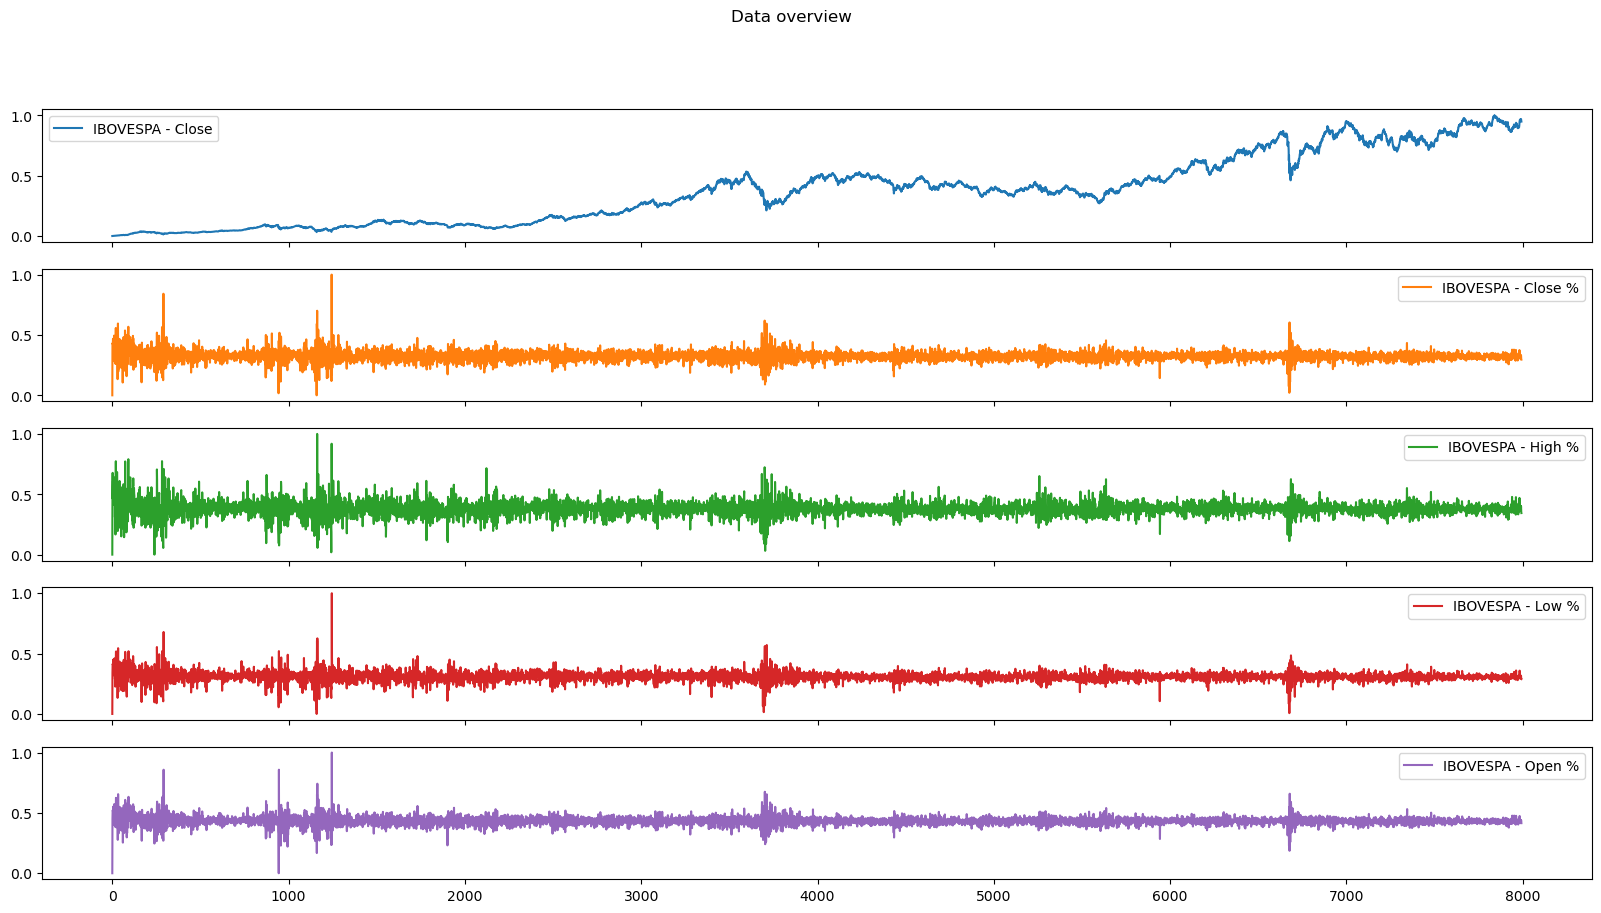

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

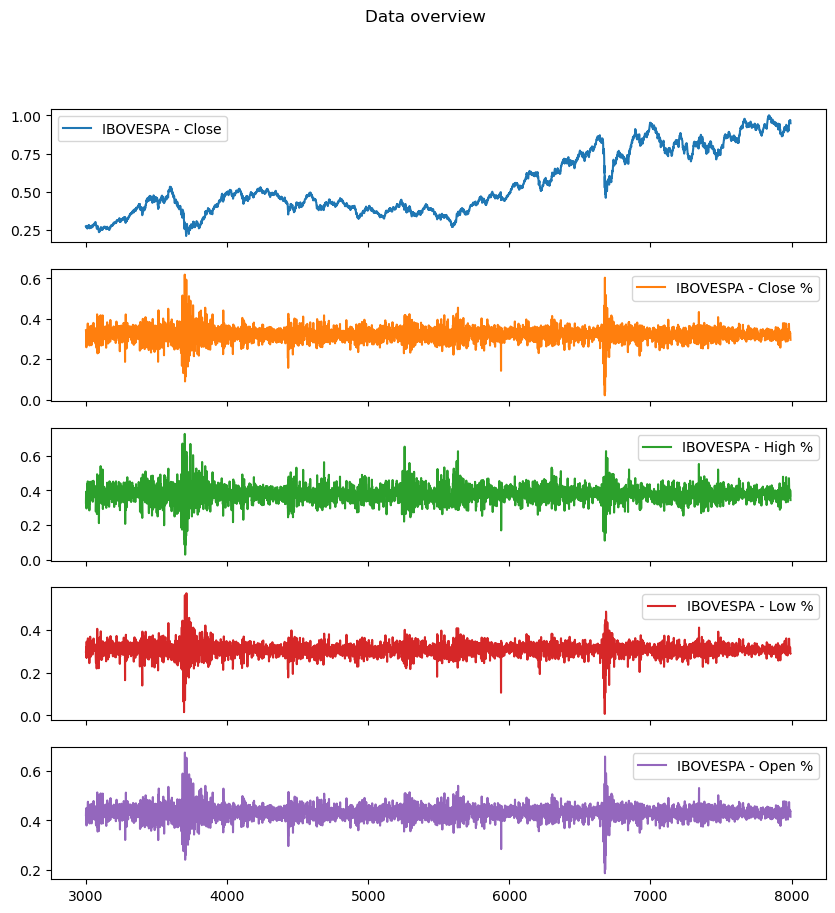

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

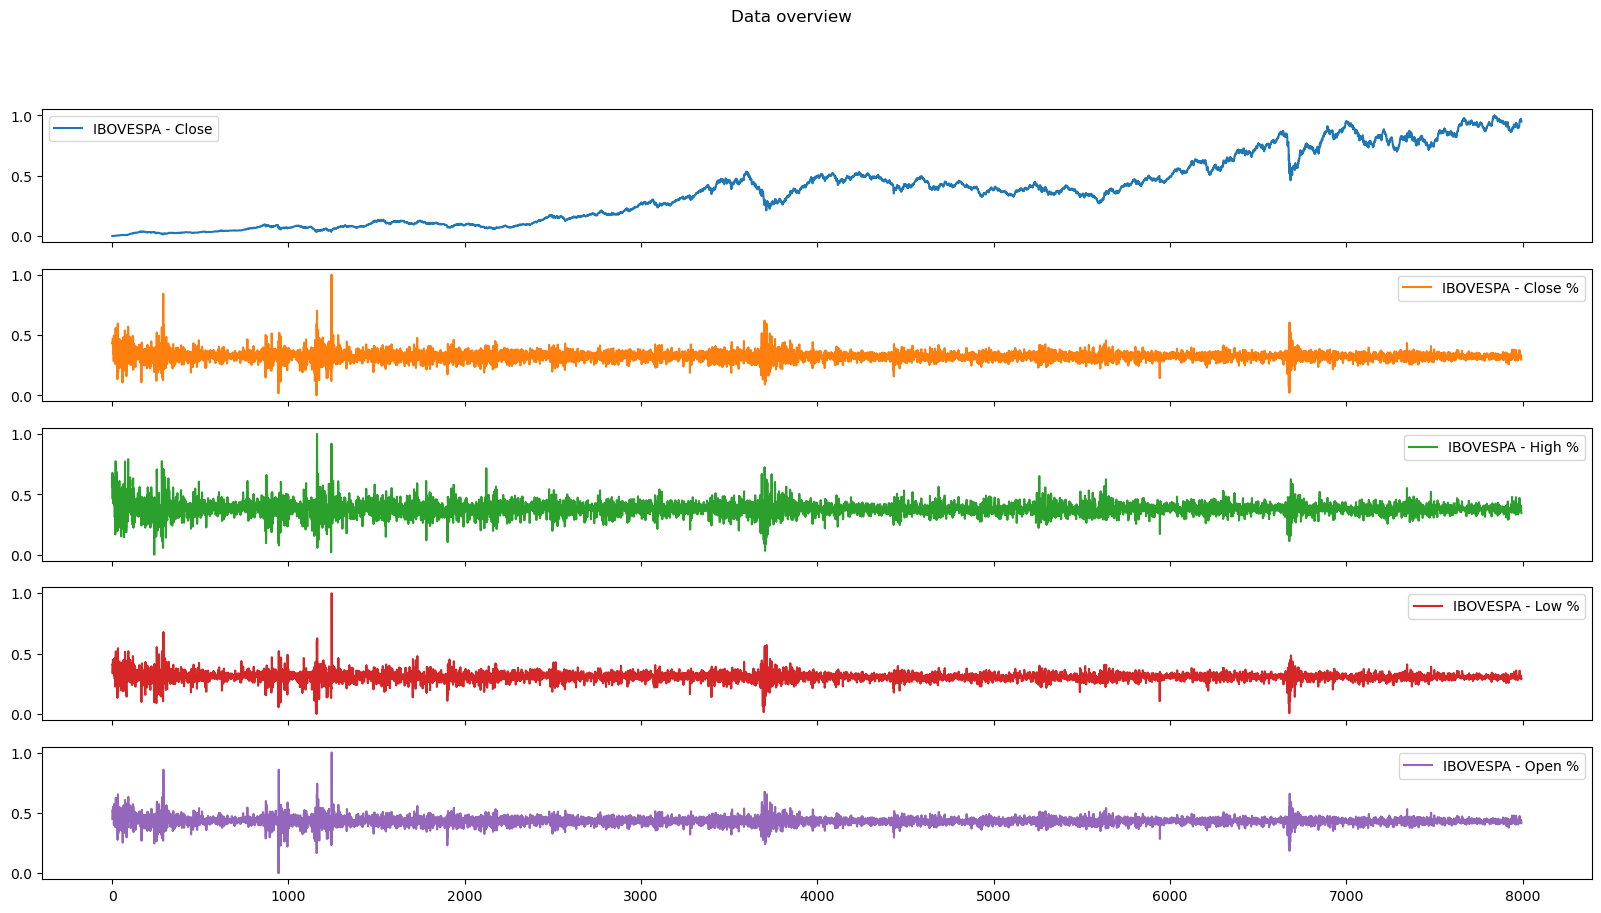

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

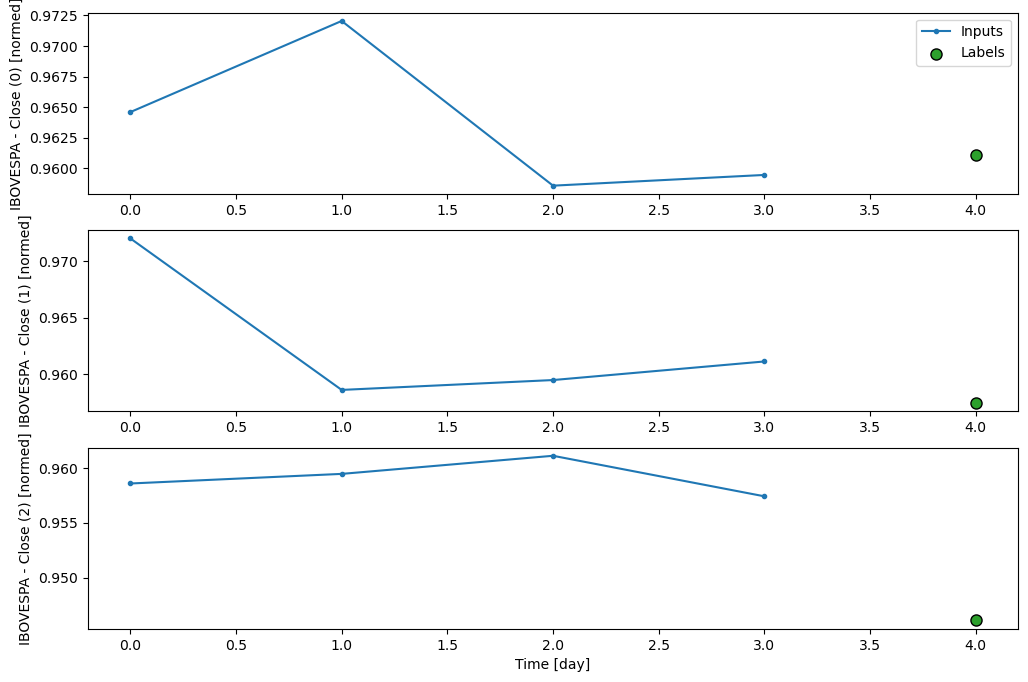

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

5

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:00 2s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 128.4793 - mean_squared_error: 2.6875e-04 - root_mean_squared_error: 0.0159 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 96.7256 - mean_squared_error: 2.3689e-04 - root_mean_squared_error: 0.0151 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 79.4592 - mean_squared_error: 2.2672e-04 - root_mean_squared_error: 0.0149

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 69.4291 - mean_squared_error: 2.4443e-04 - root_mean_squared_error: 0.0154

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.8659 - mean_squared_error: 2.5998e-04 - root_mean_squared_error: 0.0159

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.4539 - mean_squared_error: 2.6793e-04 - root_mean_squared_error: 0.0162

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 53.6478 - mean_squared_error: 2.8483e-04 - root_mean_squared_error: 0.0167

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 50.7024 - mean_squared_error: 3.0506e-04 - root_mean_squared_error: 0.0172

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 47.9533 - mean_squared_error: 3.3325e-04 - root_mean_squared_error: 0.0179

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 45.4780 - mean_squared_error: 4.1521e-04 - root_mean_squared_error: 0.0195

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 43.5466 - mean_squared_error: 6.8707e-04 - root_mean_squared_error: 0.0231

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 41.8781 - mean_squared_error: 9.4928e-04 - root_mean_squared_error: 0.0264

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 40.3867 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0291    

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 39.0426 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0313

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 37.8333 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0332

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 36.7484 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 35.7452 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0366

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 34.9040 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 34.1159 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0399 - val_loss: 0.1887 - val_mean_absolute_error: 0.1887 - val_mean_absolute_percentage_error: 20.2704 - val_mean_squared_error: 0.0369 - val_root_mean_squared_error: 0.1922


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6636 - mean_absolute_error: 0.6636 - mean_absolute_percentage_error: 28671.5781 - mean_squared_error: 0.4404 - root_mean_squared_error: 0.6636

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6239 - mean_absolute_error: 0.6239 - mean_absolute_percentage_error: 10906.3145 - mean_squared_error: 0.3913 - root_mean_squared_error: 0.6250 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5627 - mean_absolute_error: 0.5627 - mean_absolute_percentage_error: 7599.8188 - mean_squared_error: 0.3319 - root_mean_squared_error: 0.5727 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5076 - mean_absolute_error: 0.5076 - mean_absolute_percentage_error: 6202.6558 - mean_squared_error: 0.2889 - root_mean_squared_error: 0.5305

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4509 - mean_absolute_error: 0.4509 - mean_absolute_percentage_error: 5117.1904 - mean_squared_error: 0.2491 - root_mean_squared_error: 0.4880

 56/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3978 - mean_absolute_error: 0.3978 - mean_absolute_percentage_error: 4276.0864 - mean_squared_error: 0.2147 - root_mean_squared_error: 0.4485

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3595 - mean_absolute_error: 0.3595 - mean_absolute_percentage_error: 3732.4509 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4195

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 3293.8640 - mean_squared_error: 0.1712 - root_mean_squared_error: 0.3939

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 2956.3811 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3725

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2798 - mean_absolute_error: 0.2798 - mean_absolute_percentage_error: 2706.4429 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3558

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 2499.3867 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3414

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 2324.8352 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3289

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 2175.3206 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3177

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 2035.6428 - mean_squared_error: 0.1111 - root_mean_squared_error: 0.3070

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2159 - mean_absolute_error: 0.2159 - mean_absolute_percentage_error: 1914.4559 - mean_squared_error: 0.1050 - root_mean_squared_error: 0.2973

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 1815.9255 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.2892

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1996 - mean_absolute_error: 0.1996 - mean_absolute_percentage_error: 1721.1110 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2812

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1933 - mean_absolute_error: 0.1933 - mean_absolute_percentage_error: 1642.8406 - mean_squared_error: 0.0914 - root_mean_squared_error: 0.2746

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1874 - mean_absolute_error: 0.1874 - mean_absolute_percentage_error: 1566.4821 - mean_squared_error: 0.0876 - root_mean_squared_error: 0.2682

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 1497.5704 - mean_squared_error: 0.0842 - root_mean_squared_error: 0.2623


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 1458.3995 - mean_squared_error: 0.0822 - root_mean_squared_error: 0.2589 - val_loss: 0.1407 - val_mean_absolute_error: 0.1407 - val_mean_absolute_percentage_error: 15.0741 - val_mean_squared_error: 0.0211 - val_root_mean_squared_error: 0.1452


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6662 - mean_absolute_error: 0.6662 - mean_absolute_percentage_error: 28739.0469 - mean_squared_error: 0.4438 - root_mean_squared_error: 0.6662

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6460 - mean_absolute_error: 0.6460 - mean_absolute_percentage_error: 10214.1270 - mean_squared_error: 0.4179 - root_mean_squared_error: 0.6463 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6104 - mean_absolute_error: 0.6104 - mean_absolute_percentage_error: 7166.0991 - mean_squared_error: 0.3778 - root_mean_squared_error: 0.6133 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5555 - mean_absolute_error: 0.5555 - mean_absolute_percentage_error: 5743.2280 - mean_squared_error: 0.3333 - root_mean_squared_error: 0.5730

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4965 - mean_absolute_error: 0.4965 - mean_absolute_percentage_error: 4770.4868 - mean_squared_error: 0.2923 - root_mean_squared_error: 0.5325

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4476 - mean_absolute_error: 0.4476 - mean_absolute_percentage_error: 4105.2178 - mean_squared_error: 0.2602 - root_mean_squared_error: 0.4986

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4080 - mean_absolute_error: 0.4080 - mean_absolute_percentage_error: 3618.6838 - mean_squared_error: 0.2348 - root_mean_squared_error: 0.4702

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3777 - mean_absolute_error: 0.3777 - mean_absolute_percentage_error: 3271.0046 - mean_squared_error: 0.2158 - root_mean_squared_error: 0.4479

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3501 - mean_absolute_error: 0.3501 - mean_absolute_percentage_error: 2969.4272 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4271

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3270 - mean_absolute_error: 0.3270 - mean_absolute_percentage_error: 2723.8474 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.4091

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 2519.7551 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3934

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2915 - mean_absolute_error: 0.2915 - mean_absolute_percentage_error: 2346.9844 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3796

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 2209.2898 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3681

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2653 - mean_absolute_error: 0.2653 - mean_absolute_percentage_error: 2078.9758 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3567

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 1972.9297 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3472

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 1870.7987 - mean_squared_error: 0.1322 - root_mean_squared_error: 0.3378

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1779.7445 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3292

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 1697.9938 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3213

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2202 - mean_absolute_error: 0.2202 - mean_absolute_percentage_error: 1629.5712 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3146


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2154 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 1582.1322 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.3099 - val_loss: 0.1045 - val_mean_absolute_error: 0.1045 - val_mean_absolute_percentage_error: 11.1608 - val_mean_squared_error: 0.0121 - val_root_mean_squared_error: 0.1098


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5492 - mean_absolute_error: 0.5492 - mean_absolute_percentage_error: 23708.1836 - mean_squared_error: 0.3016 - root_mean_squared_error: 0.5492

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5271 - mean_absolute_error: 0.5271 - mean_absolute_percentage_error: 9075.8535 - mean_squared_error: 0.2787 - root_mean_squared_error: 0.5276  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4892 - mean_absolute_error: 0.4892 - mean_absolute_percentage_error: 6692.2524 - mean_squared_error: 0.2471 - root_mean_squared_error: 0.4952

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4338 - mean_absolute_error: 0.4338 - mean_absolute_percentage_error: 5189.9062 - mean_squared_error: 0.2098 - root_mean_squared_error: 0.4528

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3854 - mean_absolute_error: 0.3854 - mean_absolute_percentage_error: 4286.4419 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.4174

 54/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3461 - mean_absolute_error: 0.3461 - mean_absolute_percentage_error: 3675.5198 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3887

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3145 - mean_absolute_error: 0.3145 - mean_absolute_percentage_error: 3231.5068 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3652

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2845 - mean_absolute_error: 0.2845 - mean_absolute_percentage_error: 2839.3567 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3423

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2637 - mean_absolute_error: 0.2637 - mean_absolute_percentage_error: 2581.5215 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3261

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 2353.5989 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.3109

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 2152.1401 - mean_squared_error: 0.1002 - root_mean_squared_error: 0.2967

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 1997.3611 - mean_squared_error: 0.0936 - root_mean_squared_error: 0.2853

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 1865.4377 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2753

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1924 - mean_absolute_error: 0.1924 - mean_absolute_percentage_error: 1742.6819 - mean_squared_error: 0.0827 - root_mean_squared_error: 0.2656

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1832 - mean_absolute_error: 0.1832 - mean_absolute_percentage_error: 1636.5460 - mean_squared_error: 0.0781 - root_mean_squared_error: 0.2569

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1750 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 1543.7809 - mean_squared_error: 0.0740 - root_mean_squared_error: 0.2491

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1677 - mean_absolute_error: 0.1677 - mean_absolute_percentage_error: 1461.9441 - mean_squared_error: 0.0704 - root_mean_squared_error: 0.2420

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1612 - mean_absolute_error: 0.1612 - mean_absolute_percentage_error: 1389.1442 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2355

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1554 - mean_absolute_error: 0.1554 - mean_absolute_percentage_error: 1323.9241 - mean_squared_error: 0.0642 - root_mean_squared_error: 0.2296

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1503 - mean_absolute_error: 0.1503 - mean_absolute_percentage_error: 1265.1237 - mean_squared_error: 0.0616 - root_mean_squared_error: 0.2242


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 1223.6716 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2203 - val_loss: 0.0289 - val_mean_absolute_error: 0.0289 - val_mean_absolute_percentage_error: 3.0778 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0336


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3319 - mean_absolute_error: 0.3319 - mean_absolute_percentage_error: 14366.2559 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.3321

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2872 - mean_absolute_error: 0.2872 - mean_absolute_percentage_error: 4945.2495 - mean_squared_error: 0.0862 - root_mean_squared_error: 0.2921  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 3310.4358 - mean_squared_error: 0.0646 - root_mean_squared_error: 0.2490

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 2593.1118 - mean_squared_error: 0.0528 - root_mean_squared_error: 0.2221

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1713 - mean_absolute_error: 0.1713 - mean_absolute_percentage_error: 2123.8413 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.2011

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1515 - mean_absolute_error: 0.1515 - mean_absolute_percentage_error: 1810.6311 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1852

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1363 - mean_absolute_error: 0.1363 - mean_absolute_percentage_error: 1585.1066 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1727

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 1414.0670 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1626

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 1279.3889 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1541

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1063 - mean_absolute_error: 0.1063 - mean_absolute_percentage_error: 1170.2888 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1468

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 1079.9246 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1406

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 1003.7103 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1351

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 952.6820 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1313 

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 898.5082 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1272

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 846.9706 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1232

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 801.5383 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1195

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 761.1533 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1162

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 727.6456 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1134

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 697.2301 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1108


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 671.7054 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1086 - val_loss: 0.0189 - val_mean_absolute_error: 0.0189 - val_mean_absolute_percentage_error: 2.0148 - val_mean_squared_error: 4.8134e-04 - val_root_mean_squared_error: 0.0219


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1657 - mean_absolute_error: 0.1657 - mean_absolute_percentage_error: 7271.5063 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1673

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1184 - mean_absolute_error: 0.1184 - mean_absolute_percentage_error: 2463.1804 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1269 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 1586.4767 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1036

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 1201.6870 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0901

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 979.1652 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0810 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 841.5770 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0747

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 733.8941 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0694

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 658.4086 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0655

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 593.8311 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0619

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 545.4775 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0591

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 502.0164 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0566

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 473.4455 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0548

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 445.8887 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0531

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 419.5876 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0514

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 394.6885 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0498

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 372.8372 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0483

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 353.4911 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0470

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 337.4926 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0459

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 321.8628 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0448

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 307.7432 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0438


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 305.6929 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0437 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 0.9988 - val_mean_squared_error: 1.3529e-04 - val_root_mean_squared_error: 0.0116


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1564 - mean_absolute_error: 0.1564 - mean_absolute_percentage_error: 6849.7373 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1574

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1176 - mean_absolute_error: 0.1176 - mean_absolute_percentage_error: 2451.3267 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1243 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 1634.9745 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1039

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 1284.5321 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0925

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 1068.5719 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0842

 55/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 896.0148 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0769 

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 767.2138 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0708

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 679.9579 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0663

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 607.1568 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0624

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 549.6935 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0591

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 503.0634 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0563

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 467.1319 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0541

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 434.0714 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0520

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 405.7837 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0502

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 383.0428 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0486

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 362.9357 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0472

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 343.6099 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0459

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 327.6690 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0447

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 312.1329 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0436

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 299.1574 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0426


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 291.1459 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0420 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7671 - val_mean_squared_error: 7.9865e-05 - val_root_mean_squared_error: 0.0089


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 3328.9731 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0768

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 1028.4641 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0513 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 673.4846 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0421 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 513.4818 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 426.2916 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 362.5937 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 320.0860 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 285.0147 - mean_squared_error: 9.0109e-04 - root_mean_squared_error: 0.0274

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 257.5506 - mean_squared_error: 8.2274e-04 - root_mean_squared_error: 0.0261

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 235.3806 - mean_squared_error: 7.5965e-04 - root_mean_squared_error: 0.0250

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 217.0813 - mean_squared_error: 7.0921e-04 - root_mean_squared_error: 0.0241

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 201.6803 - mean_squared_error: 6.6703e-04 - root_mean_squared_error: 0.0233

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 188.5179 - mean_squared_error: 6.3077e-04 - root_mean_squared_error: 0.0226

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 177.9473 - mean_squared_error: 6.0142e-04 - root_mean_squared_error: 0.0221

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 167.8819 - mean_squared_error: 5.7332e-04 - root_mean_squared_error: 0.0215

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 160.2988 - mean_squared_error: 5.5208e-04 - root_mean_squared_error: 0.0211

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 152.8437 - mean_squared_error: 5.3114e-04 - root_mean_squared_error: 0.0207

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 146.6518 - mean_squared_error: 5.1413e-04 - root_mean_squared_error: 0.0204

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 140.5004 - mean_squared_error: 4.9801e-04 - root_mean_squared_error: 0.0201

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 135.3419 - mean_squared_error: 4.8482e-04 - root_mean_squared_error: 0.0198


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 134.4496 - mean_squared_error: 4.8255e-04 - root_mean_squared_error: 0.0198 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 0.9517 - val_mean_squared_error: 1.2351e-04 - val_root_mean_squared_error: 0.0111


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 5350.4146 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1231

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 1816.8750 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0931 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 1207.8990 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0780

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 912.4537 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0686 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 743.9084 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0623

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 632.9190 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0576

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 553.4985 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 497.5759 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0511

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 449.5824 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0485

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 410.8364 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 378.8381 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 351.9084 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 328.8952 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 308.9757 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 291.5490 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 276.1625 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 262.4659 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 252.9089 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 242.4110 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 233.6015 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350 - val_loss: 0.0169 - val_mean_absolute_error: 0.0169 - val_mean_absolute_percentage_error: 1.8005 - val_mean_squared_error: 3.5634e-04 - val_root_mean_squared_error: 0.0189


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 3813.3430 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0877

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 1270.5670 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 815.5146 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0508 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 616.4344 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 501.9752 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 426.3926 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 372.3965 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 331.7114 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 299.7836 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 273.9778 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 252.6446 - mean_squared_error: 9.5197e-04 - root_mean_squared_error: 0.0274

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 234.6756 - mean_squared_error: 8.8908e-04 - root_mean_squared_error: 0.0264

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 219.3125 - mean_squared_error: 8.3511e-04 - root_mean_squared_error: 0.0255

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 206.9707 - mean_squared_error: 7.9154e-04 - root_mean_squared_error: 0.0247

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 195.2158 - mean_squared_error: 7.4995e-04 - root_mean_squared_error: 0.0240

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 184.8416 - mean_squared_error: 7.1319e-04 - root_mean_squared_error: 0.0233

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 175.6106 - mean_squared_error: 6.8051e-04 - root_mean_squared_error: 0.0227

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 167.3396 - mean_squared_error: 6.5179e-04 - root_mean_squared_error: 0.0222

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 159.8816 - mean_squared_error: 6.2619e-04 - root_mean_squared_error: 0.0218


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 156.6812 - mean_squared_error: 6.1525e-04 - root_mean_squared_error: 0.0216 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0374 - val_mean_squared_error: 1.3882e-04 - val_root_mean_squared_error: 0.0118


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 2967.0588 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0683

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 919.5487 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 599.7548 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 456.4046 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 373.0107 - mean_squared_error: 9.6653e-04 - root_mean_squared_error: 0.0287

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 317.6527 - mean_squared_error: 8.3281e-04 - root_mean_squared_error: 0.0264

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 280.7409 - mean_squared_error: 7.4356e-04 - root_mean_squared_error: 0.0248

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 252.2717 - mean_squared_error: 6.7397e-04 - root_mean_squared_error: 0.0235

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 229.5360 - mean_squared_error: 6.1774e-04 - root_mean_squared_error: 0.0223

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 209.5139 - mean_squared_error: 5.6813e-04 - root_mean_squared_error: 0.0213

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 193.0267 - mean_squared_error: 5.2921e-04 - root_mean_squared_error: 0.0205

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 180.1751 - mean_squared_error: 5.0062e-04 - root_mean_squared_error: 0.0200

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 168.2297 - mean_squared_error: 4.7407e-04 - root_mean_squared_error: 0.0195

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 157.9113 - mean_squared_error: 4.5075e-04 - root_mean_squared_error: 0.0190

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 149.5539 - mean_squared_error: 4.3168e-04 - root_mean_squared_error: 0.0186

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 143.3013 - mean_squared_error: 4.1734e-04 - root_mean_squared_error: 0.0183

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 137.0576 - mean_squared_error: 4.0298e-04 - root_mean_squared_error: 0.0179

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 132.8812 - mean_squared_error: 3.9344e-04 - root_mean_squared_error: 0.0177

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 126.6665 - mean_squared_error: 3.8082e-04 - root_mean_squared_error: 0.0175

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 121.4769 - mean_squared_error: 3.7200e-04 - root_mean_squared_error: 0.0173


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 118.6627 - mean_squared_error: 3.6750e-04 - root_mean_squared_error: 0.0172 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2515 - val_mean_squared_error: 1.9160e-04 - val_root_mean_squared_error: 0.0138


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 3800.8408 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0874

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 1226.3359 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0634 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 789.0198 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0519 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 619.1287 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0462

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 507.6918 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 438.0247 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 383.0647 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 341.4906 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 308.8039 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 282.3565 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 260.4793 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 242.0433 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 226.2773 - mean_squared_error: 9.4684e-04 - root_mean_squared_error: 0.0275

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 212.6226 - mean_squared_error: 8.9484e-04 - root_mean_squared_error: 0.0266

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 201.5369 - mean_squared_error: 8.5251e-04 - root_mean_squared_error: 0.0259

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 190.8783 - mean_squared_error: 8.1164e-04 - root_mean_squared_error: 0.0252

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 182.0834 - mean_squared_error: 7.7790e-04 - root_mean_squared_error: 0.0247

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 173.5098 - mean_squared_error: 7.4561e-04 - root_mean_squared_error: 0.0241

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 166.3478 - mean_squared_error: 7.1896e-04 - root_mean_squared_error: 0.0236


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 161.9248 - mean_squared_error: 7.0255e-04 - root_mean_squared_error: 0.0234 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7047 - val_mean_squared_error: 6.7414e-05 - val_root_mean_squared_error: 0.0082


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 2862.3105 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0661

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 898.0354 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0448  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 587.7819 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 447.8507 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 366.3049 - mean_squared_error: 9.5602e-04 - root_mean_squared_error: 0.0287

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 315.6284 - mean_squared_error: 8.3318e-04 - root_mean_squared_error: 0.0265

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 275.9005 - mean_squared_error: 7.3606e-04 - root_mean_squared_error: 0.0247

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 247.9537 - mean_squared_error: 6.6687e-04 - root_mean_squared_error: 0.0234

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 223.9845 - mean_squared_error: 6.0716e-04 - root_mean_squared_error: 0.0222

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 204.6410 - mean_squared_error: 5.5910e-04 - root_mean_squared_error: 0.0212

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 188.6791 - mean_squared_error: 5.2065e-04 - root_mean_squared_error: 0.0204

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 176.2107 - mean_squared_error: 4.9118e-04 - root_mean_squared_error: 0.0198

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 164.6081 - mean_squared_error: 4.6386e-04 - root_mean_squared_error: 0.0192

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 154.5754 - mean_squared_error: 4.3998e-04 - root_mean_squared_error: 0.0187

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 145.8069 - mean_squared_error: 4.1896e-04 - root_mean_squared_error: 0.0182

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 138.6341 - mean_squared_error: 4.0173e-04 - root_mean_squared_error: 0.0178

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 132.7100 - mean_squared_error: 3.8750e-04 - root_mean_squared_error: 0.0175

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 126.3908 - mean_squared_error: 3.7281e-04 - root_mean_squared_error: 0.0172

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 121.1197 - mean_squared_error: 3.6104e-04 - root_mean_squared_error: 0.0169


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 116.6973 - mean_squared_error: 3.5134e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0086 - val_mean_absolute_error: 0.0086 - val_mean_absolute_percentage_error: 0.9184 - val_mean_squared_error: 1.1456e-04 - val_root_mean_squared_error: 0.0107


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 3686.9980 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0849

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 1236.6038 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0618 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 798.5137 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0508 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 605.8314 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0444

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 494.2276 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 425.1302 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 371.0228 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 333.0674 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 302.8257 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 285.8274 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 272.5986 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 259.0551 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 238.6216 - mean_squared_error: 9.3236e-04 - root_mean_squared_error: 0.0273

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 224.8995 - mean_squared_error: 8.8385e-04 - root_mean_squared_error: 0.0265

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 210.7680 - mean_squared_error: 8.3362e-04 - root_mean_squared_error: 0.0257

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 198.4642 - mean_squared_error: 7.8959e-04 - root_mean_squared_error: 0.0249

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 188.4324 - mean_squared_error: 7.5357e-04 - root_mean_squared_error: 0.0243

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 178.7521 - mean_squared_error: 7.1875e-04 - root_mean_squared_error: 0.0237

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 170.1068 - mean_squared_error: 6.8796e-04 - root_mean_squared_error: 0.0231

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 162.9059 - mean_squared_error: 6.6306e-04 - root_mean_squared_error: 0.0227


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 155.3104 - mean_squared_error: 6.3731e-04 - root_mean_squared_error: 0.0222 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8205 - val_mean_squared_error: 9.0317e-05 - val_root_mean_squared_error: 0.0095


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 3227.4373 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0743

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 1041.6566 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 689.4807 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 529.1437 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 434.4070 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 370.9448 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 325.1257 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 290.3085 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 262.8574 - mean_squared_error: 9.3622e-04 - root_mean_squared_error: 0.0280

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 242.1647 - mean_squared_error: 8.6893e-04 - root_mean_squared_error: 0.0268

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 223.4873 - mean_squared_error: 8.1110e-04 - root_mean_squared_error: 0.0259

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 208.8763 - mean_squared_error: 7.6714e-04 - root_mean_squared_error: 0.0251

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 195.2559 - mean_squared_error: 7.2568e-04 - root_mean_squared_error: 0.0244

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 185.1725 - mean_squared_error: 6.9448e-04 - root_mean_squared_error: 0.0238

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 176.1760 - mean_squared_error: 6.6629e-04 - root_mean_squared_error: 0.0233

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 167.4004 - mean_squared_error: 6.3850e-04 - root_mean_squared_error: 0.0228

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 158.9187 - mean_squared_error: 6.1140e-04 - root_mean_squared_error: 0.0223

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 151.8887 - mean_squared_error: 5.8915e-04 - root_mean_squared_error: 0.0219

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 145.5123 - mean_squared_error: 5.6926e-04 - root_mean_squared_error: 0.0215


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 139.2390 - mean_squared_error: 5.4980e-04 - root_mean_squared_error: 0.0211 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7123 - val_mean_squared_error: 6.8158e-05 - val_root_mean_squared_error: 0.0083


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 2787.1914 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0644

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 931.1878 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0459  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 599.1813 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 453.9430 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 375.4348 - mean_squared_error: 9.9635e-04 - root_mean_squared_error: 0.0294

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 318.5005 - mean_squared_error: 8.5666e-04 - root_mean_squared_error: 0.0270

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 289.1750 - mean_squared_error: 7.8350e-04 - root_mean_squared_error: 0.0257

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 270.2397 - mean_squared_error: 7.3587e-04 - root_mean_squared_error: 0.0248

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 247.5229 - mean_squared_error: 6.7825e-04 - root_mean_squared_error: 0.0237

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 230.4172 - mean_squared_error: 6.3455e-04 - root_mean_squared_error: 0.0228

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 215.7456 - mean_squared_error: 5.9698e-04 - root_mean_squared_error: 0.0220

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 203.0081 - mean_squared_error: 5.6456e-04 - root_mean_squared_error: 0.0214

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 191.8404 - mean_squared_error: 5.3662e-04 - root_mean_squared_error: 0.0208

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 185.1232 - mean_squared_error: 5.1994e-04 - root_mean_squared_error: 0.0204

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 177.9168 - mean_squared_error: 5.0206e-04 - root_mean_squared_error: 0.0200

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 172.2176 - mean_squared_error: 4.8797e-04 - root_mean_squared_error: 0.0197

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 167.7693 - mean_squared_error: 4.7703e-04 - root_mean_squared_error: 0.0195

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 163.5684 - mean_squared_error: 4.6667e-04 - root_mean_squared_error: 0.0193

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 158.8247 - mean_squared_error: 4.5492e-04 - root_mean_squared_error: 0.0190

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 155.0981 - mean_squared_error: 4.4567e-04 - root_mean_squared_error: 0.0188

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 150.1956 - mean_squared_error: 4.3352e-04 - root_mean_squared_error: 0.0185

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 143.7583 - mean_squared_error: 4.1753e-04 - root_mean_squared_error: 0.0182

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 138.4647 - mean_squared_error: 4.0438e-04 - root_mean_squared_error: 0.0179

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 133.0657 - mean_squared_error: 3.9103e-04 - root_mean_squared_error: 0.0176

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 129.5550 - mean_squared_error: 3.8248e-04 - root_mean_squared_error: 0.0174

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 125.7866 - mean_squared_error: 3.7384e-04 - root_mean_squared_error: 0.0172

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 121.8269 - mean_squared_error: 3.6500e-04 - root_mean_squared_error: 0.0170

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 116.9567 - mean_squared_error: 3.5438e-04 - root_mean_squared_error: 0.0167


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 116.5708 - mean_squared_error: 3.5354e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7450 - val_mean_squared_error: 7.4568e-05 - val_root_mean_squared_error: 0.0086


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 3063.2253 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0706

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 1075.8956 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0520 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 759.1660 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0443 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 612.5956 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 482.1791 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 412.9384 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 371.6332 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 331.3688 - mean_squared_error: 9.9795e-04 - root_mean_squared_error: 0.0290

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 297.0242 - mean_squared_error: 9.0130e-04 - root_mean_squared_error: 0.0274

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 274.2943 - mean_squared_error: 8.3671e-04 - root_mean_squared_error: 0.0263

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 253.1691 - mean_squared_error: 7.7624e-04 - root_mean_squared_error: 0.0252

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 235.3609 - mean_squared_error: 7.2507e-04 - root_mean_squared_error: 0.0242

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 218.7214 - mean_squared_error: 6.7761e-04 - root_mean_squared_error: 0.0233

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 205.7091 - mean_squared_error: 6.4112e-04 - root_mean_squared_error: 0.0226

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 193.2394 - mean_squared_error: 6.0633e-04 - root_mean_squared_error: 0.0219

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 182.3354 - mean_squared_error: 5.7601e-04 - root_mean_squared_error: 0.0213

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 175.2206 - mean_squared_error: 5.5611e-04 - root_mean_squared_error: 0.0209

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 166.3823 - mean_squared_error: 5.3128e-04 - root_mean_squared_error: 0.0204

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 158.4756 - mean_squared_error: 5.0898e-04 - root_mean_squared_error: 0.0200

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 151.9738 - mean_squared_error: 4.9061e-04 - root_mean_squared_error: 0.0196

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 145.4683 - mean_squared_error: 4.7226e-04 - root_mean_squared_error: 0.0192

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 139.5494 - mean_squared_error: 4.5604e-04 - root_mean_squared_error: 0.0188

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 134.6131 - mean_squared_error: 4.4339e-04 - root_mean_squared_error: 0.0186

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 130.0484 - mean_squared_error: 4.3219e-04 - root_mean_squared_error: 0.0184


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 127.8930 - mean_squared_error: 4.2704e-04 - root_mean_squared_error: 0.0183 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0158 - val_mean_squared_error: 1.3677e-04 - val_root_mean_squared_error: 0.0117


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 2375.3394 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0548

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 832.0658 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401   

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 555.5972 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 436.7954 - mean_squared_error: 9.8392e-04 - root_mean_squared_error: 0.0299

 45/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 352.6681 - mean_squared_error: 8.1859e-04 - root_mean_squared_error: 0.0270

 56/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 302.0215 - mean_squared_error: 7.1412e-04 - root_mean_squared_error: 0.0251

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 268.2137 - mean_squared_error: 6.4212e-04 - root_mean_squared_error: 0.0236

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 241.8827 - mean_squared_error: 5.8474e-04 - root_mean_squared_error: 0.0224

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 226.6292 - mean_squared_error: 5.5105e-04 - root_mean_squared_error: 0.0216

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 209.9106 - mean_squared_error: 5.1388e-04 - root_mean_squared_error: 0.0208

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 192.8678 - mean_squared_error: 4.7608e-04 - root_mean_squared_error: 0.0199

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 178.6466 - mean_squared_error: 4.4501e-04 - root_mean_squared_error: 0.0192

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 166.5840 - mean_squared_error: 4.1953e-04 - root_mean_squared_error: 0.0186

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 157.0909 - mean_squared_error: 4.0006e-04 - root_mean_squared_error: 0.0182

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 148.7281 - mean_squared_error: 3.8312e-04 - root_mean_squared_error: 0.0178

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 140.5994 - mean_squared_error: 3.6658e-04 - root_mean_squared_error: 0.0174

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 133.3972 - mean_squared_error: 3.5170e-04 - root_mean_squared_error: 0.0170

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 127.5234 - mean_squared_error: 3.3943e-04 - root_mean_squared_error: 0.0167

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 123.2212 - mean_squared_error: 3.3038e-04 - root_mean_squared_error: 0.0165

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 118.2746 - mean_squared_error: 3.1990e-04 - root_mean_squared_error: 0.0162

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 113.3165 - mean_squared_error: 3.0942e-04 - root_mean_squared_error: 0.0159

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 109.9903 - mean_squared_error: 3.0268e-04 - root_mean_squared_error: 0.0158

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 106.4976 - mean_squared_error: 2.9579e-04 - root_mean_squared_error: 0.0156

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 102.5480 - mean_squared_error: 2.8815e-04 - root_mean_squared_error: 0.0154


Epoch: 18 - LR: 0.006367586553096771


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 100.8586 - mean_squared_error: 2.8491e-04 - root_mean_squared_error: 0.0153 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7589 - val_mean_squared_error: 7.2451e-05 - val_root_mean_squared_error: 0.0085


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 2179.7898 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0505

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 1036.4344 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 694.4880 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 509.6507 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 378.5395 - mean_squared_error: 7.9153e-04 - root_mean_squared_error: 0.0269

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 305.8987 - mean_squared_error: 6.6058e-04 - root_mean_squared_error: 0.0243

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 261.7546 - mean_squared_error: 5.7638e-04 - root_mean_squared_error: 0.0225

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 227.5096 - mean_squared_error: 5.0861e-04 - root_mean_squared_error: 0.0210

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 201.9310 - mean_squared_error: 4.5667e-04 - root_mean_squared_error: 0.0198

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 182.0158 - mean_squared_error: 4.1561e-04 - root_mean_squared_error: 0.0187

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 166.0192 - mean_squared_error: 3.8252e-04 - root_mean_squared_error: 0.0179

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 152.8646 - mean_squared_error: 3.5587e-04 - root_mean_squared_error: 0.0172

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 141.8296 - mean_squared_error: 3.3355e-04 - root_mean_squared_error: 0.0166

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 133.0987 - mean_squared_error: 3.1582e-04 - root_mean_squared_error: 0.0161

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 124.8883 - mean_squared_error: 2.9904e-04 - root_mean_squared_error: 0.0156

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 118.2443 - mean_squared_error: 2.8541e-04 - root_mean_squared_error: 0.0152

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 112.8053 - mean_squared_error: 2.7422e-04 - root_mean_squared_error: 0.0149

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 107.4688 - mean_squared_error: 2.6324e-04 - root_mean_squared_error: 0.0146

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 102.2833 - mean_squared_error: 2.5288e-04 - root_mean_squared_error: 0.0143

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 98.6564 - mean_squared_error: 2.4605e-04 - root_mean_squared_error: 0.0141 

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 95.3030 - mean_squared_error: 2.3988e-04 - root_mean_squared_error: 0.0139


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 93.1024 - mean_squared_error: 2.3588e-04 - root_mean_squared_error: 0.0138 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6866 - val_mean_squared_error: 6.3996e-05 - val_root_mean_squared_error: 0.0080


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 1729.2031 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0401

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 626.0605 - mean_squared_error: 8.6682e-04 - root_mean_squared_error: 0.0289

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 410.1161 - mean_squared_error: 6.3679e-04 - root_mean_squared_error: 0.0245

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 327.8406 - mean_squared_error: 5.3447e-04 - root_mean_squared_error: 0.0223

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 280.6503 - mean_squared_error: 4.7098e-04 - root_mean_squared_error: 0.0208

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 258.3182 - mean_squared_error: 4.4002e-04 - root_mean_squared_error: 0.0200

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 226.8652 - mean_squared_error: 3.9521e-04 - root_mean_squared_error: 0.0189

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 198.3968 - mean_squared_error: 3.5288e-04 - root_mean_squared_error: 0.0177

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 182.2676 - mean_squared_error: 3.2817e-04 - root_mean_squared_error: 0.0170

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 173.6049 - mean_squared_error: 3.1465e-04 - root_mean_squared_error: 0.0166

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 160.1354 - mean_squared_error: 2.9334e-04 - root_mean_squared_error: 0.0160

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 149.9807 - mean_squared_error: 2.7704e-04 - root_mean_squared_error: 0.0155

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 139.1410 - mean_squared_error: 2.5946e-04 - root_mean_squared_error: 0.0149

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 129.0666 - mean_squared_error: 2.4323e-04 - root_mean_squared_error: 0.0144

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 121.9636 - mean_squared_error: 2.3236e-04 - root_mean_squared_error: 0.0141

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 115.0315 - mean_squared_error: 2.2215e-04 - root_mean_squared_error: 0.0137

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 108.9260 - mean_squared_error: 2.1338e-04 - root_mean_squared_error: 0.0135

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 104.5392 - mean_squared_error: 2.0719e-04 - root_mean_squared_error: 0.0133

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 100.0512 - mean_squared_error: 2.0077e-04 - root_mean_squared_error: 0.0131

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 95.9728 - mean_squared_error: 1.9489e-04 - root_mean_squared_error: 0.0129 

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 92.6464 - mean_squared_error: 1.9007e-04 - root_mean_squared_error: 0.0127

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 89.9397 - mean_squared_error: 1.8613e-04 - root_mean_squared_error: 0.0126

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 87.4035 - mean_squared_error: 1.8243e-04 - root_mean_squared_error: 0.0125

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 83.7244 - mean_squared_error: 1.7716e-04 - root_mean_squared_error: 0.0123

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 80.3751 - mean_squared_error: 1.7283e-04 - root_mean_squared_error: 0.0122

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 77.5799 - mean_squared_error: 1.6973e-04 - root_mean_squared_error: 0.0121

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 75.2431 - mean_squared_error: 1.6732e-04 - root_mean_squared_error: 0.0120


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 73.7709 - mean_squared_error: 1.6586e-04 - root_mean_squared_error: 0.0120 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.7002 - val_mean_squared_error: 6.3549e-05 - val_root_mean_squared_error: 0.0080


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 2456.8179 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 821.6083 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 530.7281 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 410.9897 - mean_squared_error: 9.7405e-04 - root_mean_squared_error: 0.0297

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 334.5848 - mean_squared_error: 8.1508e-04 - root_mean_squared_error: 0.0269

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 284.2164 - mean_squared_error: 7.0502e-04 - root_mean_squared_error: 0.0248

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 248.2529 - mean_squared_error: 6.2391e-04 - root_mean_squared_error: 0.0231

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 221.1289 - mean_squared_error: 5.6144e-04 - root_mean_squared_error: 0.0218

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 201.3228 - mean_squared_error: 5.1517e-04 - root_mean_squared_error: 0.0207

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 183.8623 - mean_squared_error: 4.7427e-04 - root_mean_squared_error: 0.0198

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 169.4637 - mean_squared_error: 4.4115e-04 - root_mean_squared_error: 0.0190

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 159.9794 - mean_squared_error: 4.1945e-04 - root_mean_squared_error: 0.0185

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 156.5072 - mean_squared_error: 4.1151e-04 - root_mean_squared_error: 0.0183

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 150.0428 - mean_squared_error: 3.9685e-04 - root_mean_squared_error: 0.0180

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 141.3828 - mean_squared_error: 3.7712e-04 - root_mean_squared_error: 0.0175

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 133.7613 - mean_squared_error: 3.5971e-04 - root_mean_squared_error: 0.0170

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 126.9969 - mean_squared_error: 3.4421e-04 - root_mean_squared_error: 0.0166

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 120.4725 - mean_squared_error: 3.2930e-04 - root_mean_squared_error: 0.0163

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 114.6484 - mean_squared_error: 3.1635e-04 - root_mean_squared_error: 0.0159

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 109.4155 - mean_squared_error: 3.0543e-04 - root_mean_squared_error: 0.0157

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 105.0325 - mean_squared_error: 2.9657e-04 - root_mean_squared_error: 0.0155


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 104.3402 - mean_squared_error: 2.9518e-04 - root_mean_squared_error: 0.0154 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7862 - val_mean_squared_error: 7.8449e-05 - val_root_mean_squared_error: 0.0089


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 2460.4114 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 865.0331 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0418  

 24/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 558.3448 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 415.0896 - mean_squared_error: 9.5826e-04 - root_mean_squared_error: 0.0291

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 334.8418 - mean_squared_error: 7.8469e-04 - root_mean_squared_error: 0.0260

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 289.5906 - mean_squared_error: 6.8474e-04 - root_mean_squared_error: 0.0240

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 253.5044 - mean_squared_error: 6.0387e-04 - root_mean_squared_error: 0.0224

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 226.1590 - mean_squared_error: 5.4192e-04 - root_mean_squared_error: 0.0210

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 204.6382 - mean_squared_error: 4.9292e-04 - root_mean_squared_error: 0.0199

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 185.9021 - mean_squared_error: 4.5026e-04 - root_mean_squared_error: 0.0189

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 171.6820 - mean_squared_error: 4.1843e-04 - root_mean_squared_error: 0.0182

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 158.7582 - mean_squared_error: 3.8974e-04 - root_mean_squared_error: 0.0175

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 147.8115 - mean_squared_error: 3.6543e-04 - root_mean_squared_error: 0.0169

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 138.4085 - mean_squared_error: 3.4451e-04 - root_mean_squared_error: 0.0163

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 130.8264 - mean_squared_error: 3.2761e-04 - root_mean_squared_error: 0.0159

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 123.5814 - mean_squared_error: 3.1145e-04 - root_mean_squared_error: 0.0155

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 117.1679 - mean_squared_error: 2.9719e-04 - root_mean_squared_error: 0.0151

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 111.4470 - mean_squared_error: 2.8476e-04 - root_mean_squared_error: 0.0148

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 107.0660 - mean_squared_error: 2.7570e-04 - root_mean_squared_error: 0.0145

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 103.3998 - mean_squared_error: 2.6830e-04 - root_mean_squared_error: 0.0143


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 101.3306 - mean_squared_error: 2.6416e-04 - root_mean_squared_error: 0.0142 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7062 - val_mean_squared_error: 6.7446e-05 - val_root_mean_squared_error: 0.0082


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 1616.4668 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0376

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 507.8610 - mean_squared_error: 6.8522e-04 - root_mean_squared_error: 0.0256

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 336.3825 - mean_squared_error: 5.0460e-04 - root_mean_squared_error: 0.0217

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 258.9457 - mean_squared_error: 4.1598e-04 - root_mean_squared_error: 0.0196

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 213.2707 - mean_squared_error: 3.5757e-04 - root_mean_squared_error: 0.0181

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 182.5478 - mean_squared_error: 3.1487e-04 - root_mean_squared_error: 0.0168

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 160.3075 - mean_squared_error: 2.8221e-04 - root_mean_squared_error: 0.0158

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 144.5295 - mean_squared_error: 2.5826e-04 - root_mean_squared_error: 0.0151

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 130.9180 - mean_squared_error: 2.3719e-04 - root_mean_squared_error: 0.0144

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 119.8845 - mean_squared_error: 2.2030e-04 - root_mean_squared_error: 0.0138

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 110.7491 - mean_squared_error: 2.0702e-04 - root_mean_squared_error: 0.0134

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 103.5919 - mean_squared_error: 1.9686e-04 - root_mean_squared_error: 0.0130

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 96.9171 - mean_squared_error: 1.8759e-04 - root_mean_squared_error: 0.0127 

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 91.9724 - mean_squared_error: 1.8061e-04 - root_mean_squared_error: 0.0125

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 86.8077 - mean_squared_error: 1.7332e-04 - root_mean_squared_error: 0.0122

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 82.5810 - mean_squared_error: 1.6730e-04 - root_mean_squared_error: 0.0120

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 78.7878 - mean_squared_error: 1.6197e-04 - root_mean_squared_error: 0.0118

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 75.9114 - mean_squared_error: 1.5835e-04 - root_mean_squared_error: 0.0117

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 72.7553 - mean_squared_error: 1.5501e-04 - root_mean_squared_error: 0.0116

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 69.8781 - mean_squared_error: 1.5220e-04 - root_mean_squared_error: 0.0115


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 69.4235 - mean_squared_error: 1.5176e-04 - root_mean_squared_error: 0.0115 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6791 - val_mean_squared_error: 6.2000e-05 - val_root_mean_squared_error: 0.0079


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 2033.3210 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0471

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 675.1539 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0330  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 435.7366 - mean_squared_error: 7.9805e-04 - root_mean_squared_error: 0.0271

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 337.3160 - mean_squared_error: 6.4341e-04 - root_mean_squared_error: 0.0241

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 282.5812 - mean_squared_error: 5.5247e-04 - root_mean_squared_error: 0.0221

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 247.5237 - mean_squared_error: 4.9164e-04 - root_mean_squared_error: 0.0207

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 214.1931 - mean_squared_error: 4.3192e-04 - root_mean_squared_error: 0.0193

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 191.1856 - mean_squared_error: 3.8964e-04 - root_mean_squared_error: 0.0182

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 171.7299 - mean_squared_error: 3.5331e-04 - root_mean_squared_error: 0.0172

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 157.2921 - mean_squared_error: 3.2618e-04 - root_mean_squared_error: 0.0165

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 144.4119 - mean_squared_error: 3.0267e-04 - root_mean_squared_error: 0.0158

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 133.6819 - mean_squared_error: 2.8395e-04 - root_mean_squared_error: 0.0153

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 124.5837 - mean_squared_error: 2.6828e-04 - root_mean_squared_error: 0.0148

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 116.7594 - mean_squared_error: 2.5475e-04 - root_mean_squared_error: 0.0145

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 109.9515 - mean_squared_error: 2.4289e-04 - root_mean_squared_error: 0.0141

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 104.4031 - mean_squared_error: 2.3316e-04 - root_mean_squared_error: 0.0138

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 99.0503 - mean_squared_error: 2.2375e-04 - root_mean_squared_error: 0.0135 

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 94.6208 - mean_squared_error: 2.1619e-04 - root_mean_squared_error: 0.0133

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 90.2922 - mean_squared_error: 2.0942e-04 - root_mean_squared_error: 0.0131

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 86.3807 - mean_squared_error: 2.0360e-04 - root_mean_squared_error: 0.0129


Epoch: 24 - LR: 0.005478139966726303


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 85.8125 - mean_squared_error: 2.0277e-04 - root_mean_squared_error: 0.0129 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7334 - val_mean_squared_error: 7.0045e-05 - val_root_mean_squared_error: 0.0084


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 1803.0745 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0418

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 568.8250 - mean_squared_error: 8.4799e-04 - root_mean_squared_error: 0.0283

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 374.7563 - mean_squared_error: 6.0437e-04 - root_mean_squared_error: 0.0236

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 292.1184 - mean_squared_error: 4.9008e-04 - root_mean_squared_error: 0.0210

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 238.7614 - mean_squared_error: 4.1142e-04 - root_mean_squared_error: 0.0191

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 203.3484 - mean_squared_error: 3.5681e-04 - root_mean_squared_error: 0.0176

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 177.9305 - mean_squared_error: 3.1635e-04 - root_mean_squared_error: 0.0164

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 158.6939 - mean_squared_error: 2.8513e-04 - root_mean_squared_error: 0.0155

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 143.5688 - mean_squared_error: 2.6033e-04 - root_mean_squared_error: 0.0147

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 131.3311 - mean_squared_error: 2.4055e-04 - root_mean_squared_error: 0.0141

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 121.2094 - mean_squared_error: 2.2474e-04 - root_mean_squared_error: 0.0136

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 112.6771 - mean_squared_error: 2.1145e-04 - root_mean_squared_error: 0.0132

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 105.9014 - mean_squared_error: 2.0091e-04 - root_mean_squared_error: 0.0128

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 99.9708 - mean_squared_error: 1.9165e-04 - root_mean_squared_error: 0.0125 

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 94.7329 - mean_squared_error: 1.8347e-04 - root_mean_squared_error: 0.0122

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 90.0692 - mean_squared_error: 1.7620e-04 - root_mean_squared_error: 0.0120

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 86.5540 - mean_squared_error: 1.7079e-04 - root_mean_squared_error: 0.0118

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 82.4145 - mean_squared_error: 1.6482e-04 - root_mean_squared_error: 0.0116

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 78.6916 - mean_squared_error: 1.6000e-04 - root_mean_squared_error: 0.0114


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 75.5717 - mean_squared_error: 1.5623e-04 - root_mean_squared_error: 0.0113 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7609 - val_mean_squared_error: 7.6791e-05 - val_root_mean_squared_error: 0.0088


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 1850.2441 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0430

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 613.5762 - mean_squared_error: 9.4374e-04 - root_mean_squared_error: 0.0299

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 395.6646 - mean_squared_error: 6.5681e-04 - root_mean_squared_error: 0.0245

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 300.6148 - mean_squared_error: 5.1946e-04 - root_mean_squared_error: 0.0216

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 245.7541 - mean_squared_error: 4.3627e-04 - root_mean_squared_error: 0.0196

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 209.3550 - mean_squared_error: 3.7864e-04 - root_mean_squared_error: 0.0181

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 183.2204 - mean_squared_error: 3.3589e-04 - root_mean_squared_error: 0.0169

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 163.4378 - mean_squared_error: 3.0289e-04 - root_mean_squared_error: 0.0160

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 147.8852 - mean_squared_error: 2.7679e-04 - root_mean_squared_error: 0.0152

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 135.3012 - mean_squared_error: 2.5606e-04 - root_mean_squared_error: 0.0146

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 125.6298 - mean_squared_error: 2.4074e-04 - root_mean_squared_error: 0.0141

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 116.7428 - mean_squared_error: 2.2667e-04 - root_mean_squared_error: 0.0137

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 109.6905 - mean_squared_error: 2.1547e-04 - root_mean_squared_error: 0.0133

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 103.0421 - mean_squared_error: 2.0482e-04 - root_mean_squared_error: 0.0130

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 97.6507 - mean_squared_error: 1.9615e-04 - root_mean_squared_error: 0.0127 

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 92.8492 - mean_squared_error: 1.8841e-04 - root_mean_squared_error: 0.0124

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 89.5773 - mean_squared_error: 1.8317e-04 - root_mean_squared_error: 0.0122

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 85.9093 - mean_squared_error: 1.7752e-04 - root_mean_squared_error: 0.0120

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 82.2699 - mean_squared_error: 1.7242e-04 - root_mean_squared_error: 0.0119

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 78.9565 - mean_squared_error: 1.6801e-04 - root_mean_squared_error: 0.0118


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 77.9173 - mean_squared_error: 1.6666e-04 - root_mean_squared_error: 0.0117 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7890 - val_mean_squared_error: 8.4339e-05 - val_root_mean_squared_error: 0.0092


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 997.7102 - mean_squared_error: 5.4907e-04 - root_mean_squared_error: 0.0234

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 323.0999 - mean_squared_error: 2.7479e-04 - root_mean_squared_error: 0.0163 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 215.4196 - mean_squared_error: 2.0710e-04 - root_mean_squared_error: 0.0140

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 162.9808 - mean_squared_error: 1.6743e-04 - root_mean_squared_error: 0.0125

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 134.8451 - mean_squared_error: 1.4406e-04 - root_mean_squared_error: 0.0115

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 114.5090 - mean_squared_error: 1.2624e-04 - root_mean_squared_error: 0.0107

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 103.0119 - mean_squared_error: 1.1569e-04 - root_mean_squared_error: 0.0102

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 93.0283 - mean_squared_error: 1.0626e-04 - root_mean_squared_error: 0.0097 

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 84.3441 - mean_squared_error: 9.7912e-05 - root_mean_squared_error: 0.0093

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 77.2985 - mean_squared_error: 9.1155e-05 - root_mean_squared_error: 0.0089

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 71.4590 - mean_squared_error: 8.6114e-05 - root_mean_squared_error: 0.0087

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 66.1570 - mean_squared_error: 8.2032e-05 - root_mean_squared_error: 0.0085

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 61.6671 - mean_squared_error: 7.8767e-05 - root_mean_squared_error: 0.0083

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 57.8116 - mean_squared_error: 7.6096e-05 - root_mean_squared_error: 0.0082

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 55.4437 - mean_squared_error: 7.4441e-05 - root_mean_squared_error: 0.0081

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 52.3841 - mean_squared_error: 7.2336e-05 - root_mean_squared_error: 0.0080

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 49.6809 - mean_squared_error: 7.0539e-05 - root_mean_squared_error: 0.0079

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 47.2733 - mean_squared_error: 6.9142e-05 - root_mean_squared_error: 0.0079

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 45.2738 - mean_squared_error: 6.8830e-05 - root_mean_squared_error: 0.0079

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 43.3124 - mean_squared_error: 6.9075e-05 - root_mean_squared_error: 0.0079


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 42.3337 - mean_squared_error: 6.9299e-05 - root_mean_squared_error: 0.0079 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7381 - val_mean_squared_error: 6.8518e-05 - val_root_mean_squared_error: 0.0083


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 1533.2959 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 486.6824 - mean_squared_error: 6.3152e-04 - root_mean_squared_error: 0.0245

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 322.8033 - mean_squared_error: 4.6487e-04 - root_mean_squared_error: 0.0208

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 248.0725 - mean_squared_error: 3.7713e-04 - root_mean_squared_error: 0.0186

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 204.1251 - mean_squared_error: 3.2155e-04 - root_mean_squared_error: 0.0170

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 174.6433 - mean_squared_error: 2.8194e-04 - root_mean_squared_error: 0.0158

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 153.3326 - mean_squared_error: 2.5201e-04 - root_mean_squared_error: 0.0149

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 137.1185 - mean_squared_error: 2.2868e-04 - root_mean_squared_error: 0.0141

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 124.3222 - mean_squared_error: 2.1024e-04 - root_mean_squared_error: 0.0135

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 113.9351 - mean_squared_error: 1.9572e-04 - root_mean_squared_error: 0.0130

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 105.9302 - mean_squared_error: 1.8501e-04 - root_mean_squared_error: 0.0126

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 99.0835 - mean_squared_error: 1.7581e-04 - root_mean_squared_error: 0.0123 

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 92.6951 - mean_squared_error: 1.6719e-04 - root_mean_squared_error: 0.0119

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 87.5590 - mean_squared_error: 1.6018e-04 - root_mean_squared_error: 0.0117

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 83.0188 - mean_squared_error: 1.5394e-04 - root_mean_squared_error: 0.0115

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 78.6556 - mean_squared_error: 1.4793e-04 - root_mean_squared_error: 0.0112

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 74.7730 - mean_squared_error: 1.4268e-04 - root_mean_squared_error: 0.0110

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 72.8541 - mean_squared_error: 1.4031e-04 - root_mean_squared_error: 0.0109

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 71.2947 - mean_squared_error: 1.3855e-04 - root_mean_squared_error: 0.0109

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 69.0902 - mean_squared_error: 1.3616e-04 - root_mean_squared_error: 0.0108

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 66.5936 - mean_squared_error: 1.3363e-04 - root_mean_squared_error: 0.0107


Epoch: 28 - LR: 0.004955323413014412


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 66.3769 - mean_squared_error: 1.3341e-04 - root_mean_squared_error: 0.0107 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7049 - val_mean_squared_error: 6.4050e-05 - val_root_mean_squared_error: 0.0080


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 1274.6643 - mean_squared_error: 8.9126e-04 - root_mean_squared_error: 0.0299

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 402.7180 - mean_squared_error: 4.3652e-04 - root_mean_squared_error: 0.0204  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 265.3733 - mean_squared_error: 3.1216e-04 - root_mean_squared_error: 0.0170

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 202.9860 - mean_squared_error: 2.4833e-04 - root_mean_squared_error: 0.0150

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 166.5243 - mean_squared_error: 2.0925e-04 - root_mean_squared_error: 0.0136

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 142.1926 - mean_squared_error: 1.8218e-04 - root_mean_squared_error: 0.0126

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 124.6717 - mean_squared_error: 1.6210e-04 - root_mean_squared_error: 0.0118

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 111.3759 - mean_squared_error: 1.4663e-04 - root_mean_squared_error: 0.0112

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 100.9035 - mean_squared_error: 1.3462e-04 - root_mean_squared_error: 0.0106

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 93.0133 - mean_squared_error: 1.2614e-04 - root_mean_squared_error: 0.0103 

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 86.3943 - mean_squared_error: 1.1972e-04 - root_mean_squared_error: 0.0100

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 81.6295 - mean_squared_error: 1.1520e-04 - root_mean_squared_error: 0.0099

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 76.2456 - mean_squared_error: 1.1014e-04 - root_mean_squared_error: 0.0097

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 71.5968 - mean_squared_error: 1.0573e-04 - root_mean_squared_error: 0.0095

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 67.8323 - mean_squared_error: 1.0214e-04 - root_mean_squared_error: 0.0093

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 64.2215 - mean_squared_error: 9.8687e-05 - root_mean_squared_error: 0.0092

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 61.2476 - mean_squared_error: 9.5899e-05 - root_mean_squared_error: 0.0091

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 58.3539 - mean_squared_error: 9.3631e-05 - root_mean_squared_error: 0.0090

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 55.7497 - mean_squared_error: 9.2053e-05 - root_mean_squared_error: 0.0089


Epoch: 29 - LR: 0.004832609556615353
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 53.7405 - mean_squared_error: 9.0996e-05 - root_mean_squared_error: 0.0089 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6774 - val_mean_squared_error: 5.9005e-05 - val_root_mean_squared_error: 0.0077


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 967.5098 - mean_squared_error: 5.1902e-04 - root_mean_squared_error: 0.0228

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 302.0285 - mean_squared_error: 2.5058e-04 - root_mean_squared_error: 0.0155 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 199.7881 - mean_squared_error: 1.8398e-04 - root_mean_squared_error: 0.0131

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 153.3466 - mean_squared_error: 1.4940e-04 - root_mean_squared_error: 0.0117

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 127.7785 - mean_squared_error: 1.2891e-04 - root_mean_squared_error: 0.0108

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 109.0439 - mean_squared_error: 1.1326e-04 - root_mean_squared_error: 0.0101

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 97.4381 - mean_squared_error: 1.0323e-04 - root_mean_squared_error: 0.0096 

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 88.3101 - mean_squared_error: 9.5155e-05 - root_mean_squared_error: 0.0092

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 81.5312 - mean_squared_error: 8.9118e-05 - root_mean_squared_error: 0.0088

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 75.8267 - mean_squared_error: 8.4116e-05 - root_mean_squared_error: 0.0086

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 70.0630 - mean_squared_error: 7.9619e-05 - root_mean_squared_error: 0.0083

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 64.8366 - mean_squared_error: 7.6041e-05 - root_mean_squared_error: 0.0082

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 61.0493 - mean_squared_error: 7.3494e-05 - root_mean_squared_error: 0.0080

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 57.1659 - mean_squared_error: 7.0939e-05 - root_mean_squared_error: 0.0079

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 54.0411 - mean_squared_error: 6.8853e-05 - root_mean_squared_error: 0.0078

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 51.0609 - mean_squared_error: 6.6875e-05 - root_mean_squared_error: 0.0077

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 48.6192 - mean_squared_error: 6.5299e-05 - root_mean_squared_error: 0.0076

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 46.2527 - mean_squared_error: 6.3909e-05 - root_mean_squared_error: 0.0076

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 44.2872 - mean_squared_error: 6.3320e-05 - root_mean_squared_error: 0.0076

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 42.3591 - mean_squared_error: 6.3066e-05 - root_mean_squared_error: 0.0076


Epoch: 30 - LR: 0.004712934605777264
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 41.2638 - mean_squared_error: 6.3021e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7552 - val_mean_squared_error: 7.7629e-05 - val_root_mean_squared_error: 0.0088


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 1413.5511 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0330

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 469.6393 - mean_squared_error: 5.6678e-04 - root_mean_squared_error: 0.0233

 24/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 321.9828 - mean_squared_error: 4.2974e-04 - root_mean_squared_error: 0.0201

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 241.8468 - mean_squared_error: 3.4256e-04 - root_mean_squared_error: 0.0178

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 196.5901 - mean_squared_error: 2.8887e-04 - root_mean_squared_error: 0.0162

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 168.8496 - mean_squared_error: 2.5397e-04 - root_mean_squared_error: 0.0151

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 147.2283 - mean_squared_error: 2.2565e-04 - root_mean_squared_error: 0.0141

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 131.0117 - mean_squared_error: 2.0381e-04 - root_mean_squared_error: 0.0133

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 118.3347 - mean_squared_error: 1.8647e-04 - root_mean_squared_error: 0.0127

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 109.5604 - mean_squared_error: 1.7453e-04 - root_mean_squared_error: 0.0122

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 101.5116 - mean_squared_error: 1.6435e-04 - root_mean_squared_error: 0.0119

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 94.1624 - mean_squared_error: 1.5564e-04 - root_mean_squared_error: 0.0115 

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 87.9102 - mean_squared_error: 1.4842e-04 - root_mean_squared_error: 0.0113

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 82.5171 - mean_squared_error: 1.4210e-04 - root_mean_squared_error: 0.0110

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 77.8130 - mean_squared_error: 1.3654e-04 - root_mean_squared_error: 0.0108

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 73.9711 - mean_squared_error: 1.3196e-04 - root_mean_squared_error: 0.0106

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 70.2581 - mean_squared_error: 1.2758e-04 - root_mean_squared_error: 0.0105

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 66.9384 - mean_squared_error: 1.2413e-04 - root_mean_squared_error: 0.0104

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 63.9515 - mean_squared_error: 1.2167e-04 - root_mean_squared_error: 0.0103


Epoch: 31 - LR: 0.004596223589032888
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 61.4467 - mean_squared_error: 1.1983e-04 - root_mean_squared_error: 0.0102 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6740 - val_mean_squared_error: 5.8209e-05 - val_root_mean_squared_error: 0.0076


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 1371.4385 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0319

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 454.9088 - mean_squared_error: 5.2606e-04 - root_mean_squared_error: 0.0225

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 296.0505 - mean_squared_error: 3.8226e-04 - root_mean_squared_error: 0.0189

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 229.9633 - mean_squared_error: 3.1270e-04 - root_mean_squared_error: 0.0170

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 187.7224 - mean_squared_error: 2.6464e-04 - root_mean_squared_error: 0.0155

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 159.7910 - mean_squared_error: 2.3077e-04 - root_mean_squared_error: 0.0143

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 139.7916 - mean_squared_error: 2.0543e-04 - root_mean_squared_error: 0.0134

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 124.6798 - mean_squared_error: 1.8580e-04 - root_mean_squared_error: 0.0127

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 112.8122 - mean_squared_error: 1.7025e-04 - root_mean_squared_error: 0.0121

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 103.8901 - mean_squared_error: 1.5884e-04 - root_mean_squared_error: 0.0117

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 95.8489 - mean_squared_error: 1.4927e-04 - root_mean_squared_error: 0.0113 

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 89.0806 - mean_squared_error: 1.4127e-04 - root_mean_squared_error: 0.0110

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 83.2968 - mean_squared_error: 1.3447e-04 - root_mean_squared_error: 0.0107

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 78.6521 - mean_squared_error: 1.2895e-04 - root_mean_squared_error: 0.0105

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 74.2294 - mean_squared_error: 1.2369e-04 - root_mean_squared_error: 0.0103

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 70.6108 - mean_squared_error: 1.1939e-04 - root_mean_squared_error: 0.0101

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 67.1080 - mean_squared_error: 1.1530e-04 - root_mean_squared_error: 0.0099

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 64.2015 - mean_squared_error: 1.1238e-04 - root_mean_squared_error: 0.0098

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 61.3533 - mean_squared_error: 1.0991e-04 - root_mean_squared_error: 0.0097


Epoch: 32 - LR: 0.004482402466237545
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 59.3472 - mean_squared_error: 1.0831e-04 - root_mean_squared_error: 0.0097 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6704 - val_mean_squared_error: 5.8005e-05 - val_root_mean_squared_error: 0.0076


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 899.7503 - mean_squared_error: 4.4882e-04 - root_mean_squared_error: 0.0212

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 293.3930 - mean_squared_error: 2.2307e-04 - root_mean_squared_error: 0.0146 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 185.6382 - mean_squared_error: 1.5877e-04 - root_mean_squared_error: 0.0122

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 144.9681 - mean_squared_error: 1.3075e-04 - root_mean_squared_error: 0.0110

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 118.7070 - mean_squared_error: 1.1126e-04 - root_mean_squared_error: 0.0100

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 102.4128 - mean_squared_error: 9.8572e-05 - root_mean_squared_error: 0.0094

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 89.6085 - mean_squared_error: 8.8149e-05 - root_mean_squared_error: 0.0088 

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 79.9440 - mean_squared_error: 8.0091e-05 - root_mean_squared_error: 0.0084

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 73.4174 - mean_squared_error: 7.4636e-05 - root_mean_squared_error: 0.0081

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 68.4394 - mean_squared_error: 7.0627e-05 - root_mean_squared_error: 0.0078

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 63.0024 - mean_squared_error: 6.6997e-05 - root_mean_squared_error: 0.0076

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 58.4539 - mean_squared_error: 6.4253e-05 - root_mean_squared_error: 0.0075

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 54.5849 - mean_squared_error: 6.2043e-05 - root_mean_squared_error: 0.0074

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 51.2493 - mean_squared_error: 6.0157e-05 - root_mean_squared_error: 0.0073

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 48.3411 - mean_squared_error: 5.8535e-05 - root_mean_squared_error: 0.0072

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 45.9669 - mean_squared_error: 5.7233e-05 - root_mean_squared_error: 0.0071

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 43.6727 - mean_squared_error: 5.6058e-05 - root_mean_squared_error: 0.0071

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 41.7722 - mean_squared_error: 5.5498e-05 - root_mean_squared_error: 0.0071

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 39.9136 - mean_squared_error: 5.5589e-05 - root_mean_squared_error: 0.0071


Epoch: 33 - LR: 0.004371399991214275
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 38.2322 - mean_squared_error: 5.5914e-05 - root_mean_squared_error: 0.0071 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7133 - val_mean_squared_error: 6.8926e-05 - val_root_mean_squared_error: 0.0083


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 948.6846 - mean_squared_error: 4.9249e-04 - root_mean_squared_error: 0.0222

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 307.4880 - mean_squared_error: 2.3740e-04 - root_mean_squared_error: 0.0151 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 198.7826 - mean_squared_error: 1.6965e-04 - root_mean_squared_error: 0.0126

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 151.1187 - mean_squared_error: 1.3567e-04 - root_mean_squared_error: 0.0111

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 123.5811 - mean_squared_error: 1.1477e-04 - root_mean_squared_error: 0.0101

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 105.3494 - mean_squared_error: 1.0039e-04 - root_mean_squared_error: 0.0094

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 92.2876 - mean_squared_error: 8.9709e-05 - root_mean_squared_error: 0.0089 

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 83.0751 - mean_squared_error: 8.2010e-05 - root_mean_squared_error: 0.0084

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 75.1597 - mean_squared_error: 7.5372e-05 - root_mean_squared_error: 0.0080

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 68.7654 - mean_squared_error: 7.0405e-05 - root_mean_squared_error: 0.0078

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 63.4904 - mean_squared_error: 6.7256e-05 - root_mean_squared_error: 0.0076

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 59.0502 - mean_squared_error: 6.4946e-05 - root_mean_squared_error: 0.0075

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 55.2549 - mean_squared_error: 6.3133e-05 - root_mean_squared_error: 0.0074

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 52.2050 - mean_squared_error: 6.1625e-05 - root_mean_squared_error: 0.0074

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 49.3001 - mean_squared_error: 6.0197e-05 - root_mean_squared_error: 0.0073

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 46.9223 - mean_squared_error: 5.9037e-05 - root_mean_squared_error: 0.0073

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 44.7878 - mean_squared_error: 5.8100e-05 - root_mean_squared_error: 0.0072

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.7093 - mean_squared_error: 5.7796e-05 - root_mean_squared_error: 0.0072

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 40.8371 - mean_squared_error: 5.7993e-05 - root_mean_squared_error: 0.0072


Epoch: 34 - LR: 0.004263146780431271
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 39.6456 - mean_squared_error: 5.8257e-05 - root_mean_squared_error: 0.0073 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6736 - val_mean_squared_error: 5.7571e-05 - val_root_mean_squared_error: 0.0076


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 1035.4036 - mean_squared_error: 5.8292e-04 - root_mean_squared_error: 0.0241

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 334.5205 - mean_squared_error: 2.6909e-04 - root_mean_squared_error: 0.0159  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 214.2986 - mean_squared_error: 1.8449e-04 - root_mean_squared_error: 0.0129

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 162.3875 - mean_squared_error: 1.4565e-04 - root_mean_squared_error: 0.0114

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 132.5000 - mean_squared_error: 1.2216e-04 - root_mean_squared_error: 0.0103

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 114.0504 - mean_squared_error: 1.0728e-04 - root_mean_squared_error: 0.0096

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 99.6171 - mean_squared_error: 9.5352e-05 - root_mean_squared_error: 0.0090 

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 90.2516 - mean_squared_error: 8.7526e-05 - root_mean_squared_error: 0.0086

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 82.6689 - mean_squared_error: 8.1277e-05 - root_mean_squared_error: 0.0083

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 75.3606 - mean_squared_error: 7.5618e-05 - root_mean_squared_error: 0.0080

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 69.3703 - mean_squared_error: 7.1855e-05 - root_mean_squared_error: 0.0078

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 64.7141 - mean_squared_error: 6.9240e-05 - root_mean_squared_error: 0.0077

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 60.3988 - mean_squared_error: 6.7002e-05 - root_mean_squared_error: 0.0076

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 56.9485 - mean_squared_error: 6.5208e-05 - root_mean_squared_error: 0.0075

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 53.6753 - mean_squared_error: 6.3500e-05 - root_mean_squared_error: 0.0074

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 50.7972 - mean_squared_error: 6.2003e-05 - root_mean_squared_error: 0.0074

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 48.2436 - mean_squared_error: 6.0734e-05 - root_mean_squared_error: 0.0073

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 46.1289 - mean_squared_error: 6.0065e-05 - root_mean_squared_error: 0.0073

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 44.0611 - mean_squared_error: 5.9976e-05 - root_mean_squared_error: 0.0073


Epoch: 35 - LR: 0.004157573916018009
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.1910 - mean_squared_error: 6.0128e-05 - root_mean_squared_error: 0.0073 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6553 - val_mean_squared_error: 5.5814e-05 - val_root_mean_squared_error: 0.0075


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 813.3027 - mean_squared_error: 3.6884e-04 - root_mean_squared_error: 0.0192

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 264.9557 - mean_squared_error: 1.8498e-04 - root_mean_squared_error: 0.0134 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 172.1921 - mean_squared_error: 1.3587e-04 - root_mean_squared_error: 0.0113

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 131.3165 - mean_squared_error: 1.1034e-04 - root_mean_squared_error: 0.0101

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 107.6204 - mean_squared_error: 9.4300e-05 - root_mean_squared_error: 0.0093

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 91.8907 - mean_squared_error: 8.3133e-05 - root_mean_squared_error: 0.0087 

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 80.5873 - mean_squared_error: 7.4660e-05 - root_mean_squared_error: 0.0082

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 72.0195 - mean_squared_error: 6.8076e-05 - root_mean_squared_error: 0.0078

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 65.2728 - mean_squared_error: 6.2909e-05 - root_mean_squared_error: 0.0074

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 59.8083 - mean_squared_error: 5.9208e-05 - root_mean_squared_error: 0.0072

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 55.2901 - mean_squared_error: 5.6991e-05 - root_mean_squared_error: 0.0071

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 51.4784 - mean_squared_error: 5.5358e-05 - root_mean_squared_error: 0.0070

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 48.4490 - mean_squared_error: 5.4163e-05 - root_mean_squared_error: 0.0070

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 45.5881 - mean_squared_error: 5.2989e-05 - root_mean_squared_error: 0.0069

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 43.0835 - mean_squared_error: 5.1965e-05 - root_mean_squared_error: 0.0069

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 40.8701 - mean_squared_error: 5.1092e-05 - root_mean_squared_error: 0.0068

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 38.8984 - mean_squared_error: 5.0488e-05 - root_mean_squared_error: 0.0068

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 37.1311 - mean_squared_error: 5.0642e-05 - root_mean_squared_error: 0.0068

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 35.5360 - mean_squared_error: 5.1105e-05 - root_mean_squared_error: 0.0069


Epoch: 36 - LR: 0.004054616205394268
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 34.8512 - mean_squared_error: 5.1381e-05 - root_mean_squared_error: 0.0069 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6376 - val_mean_squared_error: 5.2360e-05 - val_root_mean_squared_error: 0.0072


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 940.5459 - mean_squared_error: 4.8244e-04 - root_mean_squared_error: 0.0220

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 304.6688 - mean_squared_error: 2.2551e-04 - root_mean_squared_error: 0.0146 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 196.2123 - mean_squared_error: 1.5821e-04 - root_mean_squared_error: 0.0121

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 151.5647 - mean_squared_error: 1.2729e-04 - root_mean_squared_error: 0.0107

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 123.3259 - mean_squared_error: 1.0697e-04 - root_mean_squared_error: 0.0097

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 104.7975 - mean_squared_error: 9.3183e-05 - root_mean_squared_error: 0.0090

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 92.4784 - mean_squared_error: 8.3698e-05 - root_mean_squared_error: 0.0085 

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 83.7235 - mean_squared_error: 7.6841e-05 - root_mean_squared_error: 0.0081

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 75.4980 - mean_squared_error: 7.0400e-05 - root_mean_squared_error: 0.0077

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 69.3577 - mean_squared_error: 6.5814e-05 - root_mean_squared_error: 0.0075

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 63.8586 - mean_squared_error: 6.2566e-05 - root_mean_squared_error: 0.0073

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 59.2564 - mean_squared_error: 6.0211e-05 - root_mean_squared_error: 0.0072

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 55.3406 - mean_squared_error: 5.8389e-05 - root_mean_squared_error: 0.0071

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 51.9627 - mean_squared_error: 5.6803e-05 - root_mean_squared_error: 0.0070

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 49.2300 - mean_squared_error: 5.5535e-05 - root_mean_squared_error: 0.0070

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 46.6110 - mean_squared_error: 5.4336e-05 - root_mean_squared_error: 0.0069

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 44.2857 - mean_squared_error: 5.3365e-05 - root_mean_squared_error: 0.0069

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 42.2073 - mean_squared_error: 5.3000e-05 - root_mean_squared_error: 0.0069

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 40.3371 - mean_squared_error: 5.3128e-05 - root_mean_squared_error: 0.0069


Epoch: 37 - LR: 0.003954207058995962
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 38.8942 - mean_squared_error: 5.3395e-05 - root_mean_squared_error: 0.0070 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6658 - val_mean_squared_error: 5.9763e-05 - val_root_mean_squared_error: 0.0077


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 896.4731 - mean_squared_error: 4.3918e-04 - root_mean_squared_error: 0.0210

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 290.3381 - mean_squared_error: 2.0831e-04 - root_mean_squared_error: 0.0141 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 182.7239 - mean_squared_error: 1.4449e-04 - root_mean_squared_error: 0.0115

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 139.8577 - mean_squared_error: 1.1598e-04 - root_mean_squared_error: 0.0102

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 114.7675 - mean_squared_error: 9.8275e-05 - root_mean_squared_error: 0.0094

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 98.0458 - mean_squared_error: 8.6074e-05 - root_mean_squared_error: 0.0087 

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 86.8147 - mean_squared_error: 7.7578e-05 - root_mean_squared_error: 0.0082

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 77.4941 - mean_squared_error: 7.0410e-05 - root_mean_squared_error: 0.0078

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 70.1653 - mean_squared_error: 6.4790e-05 - root_mean_squared_error: 0.0074

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 64.2368 - mean_squared_error: 6.0740e-05 - root_mean_squared_error: 0.0072

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 59.3421 - mean_squared_error: 5.8428e-05 - root_mean_squared_error: 0.0071

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 55.2181 - mean_squared_error: 5.6842e-05 - root_mean_squared_error: 0.0070

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 51.6891 - mean_squared_error: 5.5546e-05 - root_mean_squared_error: 0.0070

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 48.6303 - mean_squared_error: 5.4364e-05 - root_mean_squared_error: 0.0069

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 45.9522 - mean_squared_error: 5.3328e-05 - root_mean_squared_error: 0.0069

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 43.5847 - mean_squared_error: 5.2420e-05 - root_mean_squared_error: 0.0069

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 41.4753 - mean_squared_error: 5.1744e-05 - root_mean_squared_error: 0.0068

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 39.5842 - mean_squared_error: 5.1811e-05 - root_mean_squared_error: 0.0069

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 37.8772 - mean_squared_error: 5.2128e-05 - root_mean_squared_error: 0.0069


Epoch: 38 - LR: 0.003856285475194454
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 37.2642 - mean_squared_error: 5.2293e-05 - root_mean_squared_error: 0.0069 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6383 - val_mean_squared_error: 5.2225e-05 - val_root_mean_squared_error: 0.0072


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 869.4742 - mean_squared_error: 4.1093e-04 - root_mean_squared_error: 0.0203

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 280.5973 - mean_squared_error: 1.9655e-04 - root_mean_squared_error: 0.0137 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 181.3578 - mean_squared_error: 1.4055e-04 - root_mean_squared_error: 0.0114

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 137.8512 - mean_squared_error: 1.1235e-04 - root_mean_squared_error: 0.0101

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 112.7565 - mean_squared_error: 9.5156e-05 - root_mean_squared_error: 0.0092

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 97.2135 - mean_squared_error: 8.4074e-05 - root_mean_squared_error: 0.0086 

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 88.3823 - mean_squared_error: 7.7560e-05 - root_mean_squared_error: 0.0083

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 78.3935 - mean_squared_error: 7.0033e-05 - root_mean_squared_error: 0.0078

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 70.6428 - mean_squared_error: 6.4176e-05 - root_mean_squared_error: 0.0074

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 64.8665 - mean_squared_error: 6.0001e-05 - root_mean_squared_error: 0.0072

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 59.7001 - mean_squared_error: 5.7111e-05 - root_mean_squared_error: 0.0070

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 55.3824 - mean_squared_error: 5.5134e-05 - root_mean_squared_error: 0.0069

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 51.7121 - mean_squared_error: 5.3649e-05 - root_mean_squared_error: 0.0069

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 49.0065 - mean_squared_error: 5.2555e-05 - root_mean_squared_error: 0.0068

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 47.2301 - mean_squared_error: 5.1832e-05 - root_mean_squared_error: 0.0068

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 45.3972 - mean_squared_error: 5.1089e-05 - root_mean_squared_error: 0.0067

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 43.7176 - mean_squared_error: 5.0423e-05 - root_mean_squared_error: 0.0067

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 41.5235 - mean_squared_error: 4.9624e-05 - root_mean_squared_error: 0.0067

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 39.5639 - mean_squared_error: 4.9296e-05 - root_mean_squared_error: 0.0067

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 37.9314 - mean_squared_error: 4.9487e-05 - root_mean_squared_error: 0.0067

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 36.3255 - mean_squared_error: 4.9878e-05 - root_mean_squared_error: 0.0068


Epoch: 39 - LR: 0.0037607881240546703
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 36.2084 - mean_squared_error: 4.9911e-05 - root_mean_squared_error: 0.0068 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6573 - val_mean_squared_error: 5.7876e-05 - val_root_mean_squared_error: 0.0076


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 878.8719 - mean_squared_error: 4.2144e-04 - root_mean_squared_error: 0.0205

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 283.7579 - mean_squared_error: 1.9937e-04 - root_mean_squared_error: 0.0138 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 187.9060 - mean_squared_error: 1.4424e-04 - root_mean_squared_error: 0.0116

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 141.5551 - mean_squared_error: 1.1404e-04 - root_mean_squared_error: 0.0102

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 115.2187 - mean_squared_error: 9.5928e-05 - root_mean_squared_error: 0.0092

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 99.0459 - mean_squared_error: 8.4401e-05 - root_mean_squared_error: 0.0086 

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 86.4210 - mean_squared_error: 7.5081e-05 - root_mean_squared_error: 0.0081

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 76.9396 - mean_squared_error: 6.7947e-05 - root_mean_squared_error: 0.0076

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 69.5250 - mean_squared_error: 6.2386e-05 - root_mean_squared_error: 0.0073

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 63.9686 - mean_squared_error: 5.8518e-05 - root_mean_squared_error: 0.0071

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 58.9805 - mean_squared_error: 5.6052e-05 - root_mean_squared_error: 0.0069

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 55.0934 - mean_squared_error: 5.4495e-05 - root_mean_squared_error: 0.0069

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 51.4820 - mean_squared_error: 5.3175e-05 - root_mean_squared_error: 0.0068

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 48.5879 - mean_squared_error: 5.2071e-05 - root_mean_squared_error: 0.0068

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 45.8381 - mean_squared_error: 5.1032e-05 - root_mean_squared_error: 0.0067

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 43.5922 - mean_squared_error: 5.0187e-05 - root_mean_squared_error: 0.0067

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 41.4213 - mean_squared_error: 4.9438e-05 - root_mean_squared_error: 0.0067

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 39.6225 - mean_squared_error: 4.9211e-05 - root_mean_squared_error: 0.0067

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 37.8624 - mean_squared_error: 4.9444e-05 - root_mean_squared_error: 0.0067


Epoch: 40 - LR: 0.003667655400931835


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 36.3868 - mean_squared_error: 4.9814e-05 - root_mean_squared_error: 0.0067 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7169 - val_mean_squared_error: 6.9860e-05 - val_root_mean_squared_error: 0.0084


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 768.5721 - mean_squared_error: 3.2304e-04 - root_mean_squared_error: 0.0180

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 272.0404 - mean_squared_error: 1.6496e-04 - root_mean_squared_error: 0.0126 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 173.5474 - mean_squared_error: 1.2308e-04 - root_mean_squared_error: 0.0108

 33/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 136.9648 - mean_squared_error: 1.0341e-04 - root_mean_squared_error: 0.0098

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 114.3858 - mean_squared_error: 8.9987e-05 - root_mean_squared_error: 0.0091

 55/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 96.3228 - mean_squared_error: 7.8518e-05 - root_mean_squared_error: 0.0085 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 85.5384 - mean_squared_error: 7.1418e-05 - root_mean_squared_error: 0.0080

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 75.0117 - mean_squared_error: 6.4175e-05 - root_mean_squared_error: 0.0076

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 67.0338 - mean_squared_error: 5.8544e-05 - root_mean_squared_error: 0.0072

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 61.1881 - mean_squared_error: 5.4430e-05 - root_mean_squared_error: 0.0069

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 56.3839 - mean_squared_error: 5.1375e-05 - root_mean_squared_error: 0.0067

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 52.3682 - mean_squared_error: 4.9780e-05 - root_mean_squared_error: 0.0067

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 48.9501 - mean_squared_error: 4.8779e-05 - root_mean_squared_error: 0.0066

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 45.9996 - mean_squared_error: 4.8010e-05 - root_mean_squared_error: 0.0066

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 43.4227 - mean_squared_error: 4.7284e-05 - root_mean_squared_error: 0.0066

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 41.1515 - mean_squared_error: 4.6636e-05 - root_mean_squared_error: 0.0065

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 38.9749 - mean_squared_error: 4.6018e-05 - root_mean_squared_error: 0.0065

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 37.1833 - mean_squared_error: 4.5552e-05 - root_mean_squared_error: 0.0065

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 35.5684 - mean_squared_error: 4.5437e-05 - root_mean_squared_error: 0.0065

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 34.1052 - mean_squared_error: 4.5831e-05 - root_mean_squared_error: 0.0065

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 32.7718 - mean_squared_error: 4.6379e-05 - root_mean_squared_error: 0.0066


Epoch: 41 - LR: 0.0035768295638263226
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 32.4569 - mean_squared_error: 4.6526e-05 - root_mean_squared_error: 0.0066 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6819 - val_mean_squared_error: 6.2918e-05 - val_root_mean_squared_error: 0.0079


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 705.3669 - mean_squared_error: 2.7252e-04 - root_mean_squared_error: 0.0165

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 223.8683 - mean_squared_error: 1.2539e-04 - root_mean_squared_error: 0.0109 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 147.7874 - mean_squared_error: 9.1088e-05 - root_mean_squared_error: 0.0092

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 113.5566 - mean_squared_error: 7.4612e-05 - root_mean_squared_error: 0.0083

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 92.1547 - mean_squared_error: 6.3529e-05 - root_mean_squared_error: 0.0076 

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 79.1113 - mean_squared_error: 5.6433e-05 - root_mean_squared_error: 0.0071

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 68.9786 - mean_squared_error: 5.0638e-05 - root_mean_squared_error: 0.0067

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 61.3912 - mean_squared_error: 4.6159e-05 - root_mean_squared_error: 0.0064

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 55.4686 - mean_squared_error: 4.2673e-05 - root_mean_squared_error: 0.0061

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 51.0359 - mean_squared_error: 4.0328e-05 - root_mean_squared_error: 0.0060

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 47.0614 - mean_squared_error: 3.9168e-05 - root_mean_squared_error: 0.0059

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 44.4505 - mean_squared_error: 3.8697e-05 - root_mean_squared_error: 0.0059

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 41.7186 - mean_squared_error: 3.8318e-05 - root_mean_squared_error: 0.0059

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 39.3400 - mean_squared_error: 3.7994e-05 - root_mean_squared_error: 0.0059

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 37.0856 - mean_squared_error: 3.7671e-05 - root_mean_squared_error: 0.0059

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 35.2492 - mean_squared_error: 3.7422e-05 - root_mean_squared_error: 0.0059

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 33.4776 - mean_squared_error: 3.7227e-05 - root_mean_squared_error: 0.0059

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 32.0120 - mean_squared_error: 3.7289e-05 - root_mean_squared_error: 0.0059

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 30.5808 - mean_squared_error: 3.7969e-05 - root_mean_squared_error: 0.0060

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 29.3825 - mean_squared_error: 3.8762e-05 - root_mean_squared_error: 0.0060


Epoch: 42 - LR: 0.0034882528707385063
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 29.0066 - mean_squared_error: 3.9045e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6425 - val_mean_squared_error: 5.2733e-05 - val_root_mean_squared_error: 0.0073


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 713.2332 - mean_squared_error: 2.8006e-04 - root_mean_squared_error: 0.0167

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 240.5322 - mean_squared_error: 1.4027e-04 - root_mean_squared_error: 0.0116 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 149.4425 - mean_squared_error: 1.0294e-04 - root_mean_squared_error: 0.0099

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 115.9433 - mean_squared_error: 8.4817e-05 - root_mean_squared_error: 0.0089

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 94.6423 - mean_squared_error: 7.2475e-05 - root_mean_squared_error: 0.0082 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 80.6299 - mean_squared_error: 6.4013e-05 - root_mean_squared_error: 0.0076

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 71.2831 - mean_squared_error: 5.8038e-05 - root_mean_squared_error: 0.0072

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 63.5655 - mean_squared_error: 5.2980e-05 - root_mean_squared_error: 0.0069

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 57.5228 - mean_squared_error: 4.9088e-05 - root_mean_squared_error: 0.0066

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 52.6465 - mean_squared_error: 4.6328e-05 - root_mean_squared_error: 0.0064

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 48.9104 - mean_squared_error: 4.4959e-05 - root_mean_squared_error: 0.0064

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 45.4824 - mean_squared_error: 4.3875e-05 - root_mean_squared_error: 0.0063

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 42.7658 - mean_squared_error: 4.3131e-05 - root_mean_squared_error: 0.0063

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 40.3910 - mean_squared_error: 4.2452e-05 - root_mean_squared_error: 0.0062

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 38.2963 - mean_squared_error: 4.1870e-05 - root_mean_squared_error: 0.0062

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 36.4333 - mean_squared_error: 4.1368e-05 - root_mean_squared_error: 0.0062

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 34.7636 - mean_squared_error: 4.0968e-05 - root_mean_squared_error: 0.0062

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 33.1397 - mean_squared_error: 4.0933e-05 - root_mean_squared_error: 0.0062

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 31.7865 - mean_squared_error: 4.1376e-05 - root_mean_squared_error: 0.0062


Epoch: 43 - LR: 0.0034018701408058405
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 30.3578 - mean_squared_error: 4.2075e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6568 - val_mean_squared_error: 5.7794e-05 - val_root_mean_squared_error: 0.0076


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 411.2321 - mean_squared_error: 9.8223e-05 - root_mean_squared_error: 0.0099

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 130.2379 - mean_squared_error: 5.3083e-05 - root_mean_squared_error: 0.0072 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 84.6572 - mean_squared_error: 3.9635e-05 - root_mean_squared_error: 0.0062 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 63.4553 - mean_squared_error: 3.2059e-05 - root_mean_squared_error: 0.0055

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 52.3447 - mean_squared_error: 2.8166e-05 - root_mean_squared_error: 0.0051

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 44.9340 - mean_squared_error: 2.5547e-05 - root_mean_squared_error: 0.0049

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 39.9509 - mean_squared_error: 2.3647e-05 - root_mean_squared_error: 0.0047

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 35.8058 - mean_squared_error: 2.2062e-05 - root_mean_squared_error: 0.0045

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 32.5371 - mean_squared_error: 2.0907e-05 - root_mean_squared_error: 0.0044

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 29.8873 - mean_squared_error: 2.0518e-05 - root_mean_squared_error: 0.0044

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 27.6994 - mean_squared_error: 2.1124e-05 - root_mean_squared_error: 0.0045

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 25.8512 - mean_squared_error: 2.1874e-05 - root_mean_squared_error: 0.0045

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 24.2659 - mean_squared_error: 2.2572e-05 - root_mean_squared_error: 0.0046

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 22.8888 - mean_squared_error: 2.3141e-05 - root_mean_squared_error: 0.0047

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 21.6813 - mean_squared_error: 2.3651e-05 - root_mean_squared_error: 0.0047

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 20.6119 - mean_squared_error: 2.4125e-05 - root_mean_squared_error: 0.0048

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 19.6576 - mean_squared_error: 2.4676e-05 - root_mean_squared_error: 0.0049

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 18.8014 - mean_squared_error: 2.5813e-05 - root_mean_squared_error: 0.0050

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 18.0844 - mean_squared_error: 2.6973e-05 - root_mean_squared_error: 0.0051


Epoch: 44 - LR: 0.0033176259603351355
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.7494 - mean_squared_error: 2.7574e-05 - root_mean_squared_error: 0.0051 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6320 - val_mean_squared_error: 5.1735e-05 - val_root_mean_squared_error: 0.0072


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 577.0520 - mean_squared_error: 1.8543e-04 - root_mean_squared_error: 0.0136

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 171.9578 - mean_squared_error: 7.5619e-05 - root_mean_squared_error: 0.0084 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 115.8437 - mean_squared_error: 5.5387e-05 - root_mean_squared_error: 0.0071

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 88.2696 - mean_squared_error: 4.5623e-05 - root_mean_squared_error: 0.0065 

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 72.4453 - mean_squared_error: 3.9980e-05 - root_mean_squared_error: 0.0060

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 61.9227 - mean_squared_error: 3.5832e-05 - root_mean_squared_error: 0.0057

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 54.3634 - mean_squared_error: 3.2601e-05 - root_mean_squared_error: 0.0054

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 48.6343 - mean_squared_error: 3.0107e-05 - root_mean_squared_error: 0.0052

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 44.4362 - mean_squared_error: 2.8369e-05 - root_mean_squared_error: 0.0051

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 40.7252 - mean_squared_error: 2.7283e-05 - root_mean_squared_error: 0.0050

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 37.8793 - mean_squared_error: 2.7189e-05 - root_mean_squared_error: 0.0050

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 35.2647 - mean_squared_error: 2.7308e-05 - root_mean_squared_error: 0.0050

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 33.0299 - mean_squared_error: 2.7540e-05 - root_mean_squared_error: 0.0051

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 31.0943 - mean_squared_error: 2.7722e-05 - root_mean_squared_error: 0.0051

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 29.5235 - mean_squared_error: 2.7886e-05 - root_mean_squared_error: 0.0051

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 28.0134 - mean_squared_error: 2.8068e-05 - root_mean_squared_error: 0.0051

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 26.6691 - mean_squared_error: 2.8349e-05 - root_mean_squared_error: 0.0052

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 25.4650 - mean_squared_error: 2.9150e-05 - root_mean_squared_error: 0.0053

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 24.3792 - mean_squared_error: 3.0210e-05 - root_mean_squared_error: 0.0054


Epoch: 45 - LR: 0.0032354681752622128
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 23.7623 - mean_squared_error: 3.0919e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6265 - val_mean_squared_error: 5.0850e-05 - val_root_mean_squared_error: 0.0071


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 525.3073 - mean_squared_error: 1.5432e-04 - root_mean_squared_error: 0.0124

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 156.4310 - mean_squared_error: 6.2372e-05 - root_mean_squared_error: 0.0076 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 101.6549 - mean_squared_error: 4.2816e-05 - root_mean_squared_error: 0.0062

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 77.4986 - mean_squared_error: 3.4406e-05 - root_mean_squared_error: 0.0055 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 63.5684 - mean_squared_error: 2.9692e-05 - root_mean_squared_error: 0.0051

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 54.3279 - mean_squared_error: 2.6539e-05 - root_mean_squared_error: 0.0048

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 48.1431 - mean_squared_error: 2.4324e-05 - root_mean_squared_error: 0.0046

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 43.0200 - mean_squared_error: 2.2509e-05 - root_mean_squared_error: 0.0045

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 39.2759 - mean_squared_error: 2.1308e-05 - root_mean_squared_error: 0.0043

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 35.9727 - mean_squared_error: 2.0721e-05 - root_mean_squared_error: 0.0043

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 33.4446 - mean_squared_error: 2.1037e-05 - root_mean_squared_error: 0.0044

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 31.1252 - mean_squared_error: 2.1560e-05 - root_mean_squared_error: 0.0044

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 29.1449 - mean_squared_error: 2.2142e-05 - root_mean_squared_error: 0.0045

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 27.4312 - mean_squared_error: 2.2625e-05 - root_mean_squared_error: 0.0046

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 26.0415 - mean_squared_error: 2.3033e-05 - root_mean_squared_error: 0.0046

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 24.7064 - mean_squared_error: 2.3449e-05 - root_mean_squared_error: 0.0047

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 23.6052 - mean_squared_error: 2.3888e-05 - root_mean_squared_error: 0.0047

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 22.5330 - mean_squared_error: 2.4800e-05 - root_mean_squared_error: 0.0048

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 21.5670 - mean_squared_error: 2.5974e-05 - root_mean_squared_error: 0.0049


Epoch: 46 - LR: 0.0031553448643535376
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 20.9522 - mean_squared_error: 2.6835e-05 - root_mean_squared_error: 0.0050 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6892 - val_mean_squared_error: 6.4687e-05 - val_root_mean_squared_error: 0.0080


Epoch 47/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 511.0418 - mean_squared_error: 1.4873e-04 - root_mean_squared_error: 0.0122

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 152.3991 - mean_squared_error: 6.2614e-05 - root_mean_squared_error: 0.0077 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 100.5451 - mean_squared_error: 4.5902e-05 - root_mean_squared_error: 0.0065

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 77.4046 - mean_squared_error: 3.8580e-05 - root_mean_squared_error: 0.0060 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 63.9102 - mean_squared_error: 3.4257e-05 - root_mean_squared_error: 0.0056

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 54.8507 - mean_squared_error: 3.1007e-05 - root_mean_squared_error: 0.0054

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 48.7376 - mean_squared_error: 2.8596e-05 - root_mean_squared_error: 0.0051

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 43.6466 - mean_squared_error: 2.6537e-05 - root_mean_squared_error: 0.0049

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 39.6318 - mean_squared_error: 2.4988e-05 - root_mean_squared_error: 0.0048

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 36.3770 - mean_squared_error: 2.4255e-05 - root_mean_squared_error: 0.0047

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 33.6882 - mean_squared_error: 2.4615e-05 - root_mean_squared_error: 0.0048

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 31.4181 - mean_squared_error: 2.5207e-05 - root_mean_squared_error: 0.0049

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 29.4714 - mean_squared_error: 2.5759e-05 - root_mean_squared_error: 0.0049

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 27.7812 - mean_squared_error: 2.6205e-05 - root_mean_squared_error: 0.0050

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 26.4068 - mean_squared_error: 2.6573e-05 - root_mean_squared_error: 0.0050

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 25.0832 - mean_squared_error: 2.6960e-05 - root_mean_squared_error: 0.0051

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 23.9894 - mean_squared_error: 2.7404e-05 - root_mean_squared_error: 0.0051

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 22.9223 - mean_squared_error: 2.8374e-05 - root_mean_squared_error: 0.0052

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 22.0297 - mean_squared_error: 2.9445e-05 - root_mean_squared_error: 0.0053


Epoch: 47 - LR: 0.0030772059690207243
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 21.4780 - mean_squared_error: 3.0204e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6886 - val_mean_squared_error: 6.4681e-05 - val_root_mean_squared_error: 0.0080


Epoch 48/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 822.0031 - mean_squared_error: 3.6552e-04 - root_mean_squared_error: 0.0191

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 264.3637 - mean_squared_error: 1.6768e-04 - root_mean_squared_error: 0.0126 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 170.0343 - mean_squared_error: 1.1706e-04 - root_mean_squared_error: 0.0104

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 128.9005 - mean_squared_error: 9.2510e-05 - root_mean_squared_error: 0.0091

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 106.7448 - mean_squared_error: 7.8894e-05 - root_mean_squared_error: 0.0083

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 91.7297 - mean_squared_error: 6.9455e-05 - root_mean_squared_error: 0.0078 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 80.8026 - mean_squared_error: 6.2366e-05 - root_mean_squared_error: 0.0073

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 71.8394 - mean_squared_error: 5.6486e-05 - root_mean_squared_error: 0.0070

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 64.8551 - mean_squared_error: 5.1983e-05 - root_mean_squared_error: 0.0067

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 59.2400 - mean_squared_error: 4.8706e-05 - root_mean_squared_error: 0.0064

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 54.6244 - mean_squared_error: 4.6878e-05 - root_mean_squared_error: 0.0064

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 50.7498 - mean_squared_error: 4.5571e-05 - root_mean_squared_error: 0.0063

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 47.4453 - mean_squared_error: 4.4570e-05 - root_mean_squared_error: 0.0063

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 44.5893 - mean_squared_error: 4.3678e-05 - root_mean_squared_error: 0.0062

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 42.2754 - mean_squared_error: 4.2971e-05 - root_mean_squared_error: 0.0062

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 40.0547 - mean_squared_error: 4.2322e-05 - root_mean_squared_error: 0.0062

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 38.2248 - mean_squared_error: 4.1880e-05 - root_mean_squared_error: 0.0061

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 36.4438 - mean_squared_error: 4.1899e-05 - root_mean_squared_error: 0.0062

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 35.0766 - mean_squared_error: 4.2245e-05 - root_mean_squared_error: 0.0062

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 33.9301 - mean_squared_error: 4.2665e-05 - root_mean_squared_error: 0.0062


Epoch: 48 - LR: 0.0030010018963366747
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 33.7111 - mean_squared_error: 4.2754e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6399 - val_mean_squared_error: 5.4203e-05 - val_root_mean_squared_error: 0.0074


Epoch 49/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 295.3022 - mean_squared_error: 5.4227e-05 - root_mean_squared_error: 0.0074

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 85.3823 - mean_squared_error: 2.2241e-05 - root_mean_squared_error: 0.0046  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 55.6369 - mean_squared_error: 1.5655e-05 - root_mean_squared_error: 0.0038

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 42.5200 - mean_squared_error: 1.2948e-05 - root_mean_squared_error: 0.0034

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 34.9890 - mean_squared_error: 1.1590e-05 - root_mean_squared_error: 0.0033

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 30.0289 - mean_squared_error: 1.0964e-05 - root_mean_squared_error: 0.0032

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 26.7232 - mean_squared_error: 1.0533e-05 - root_mean_squared_error: 0.0031

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 24.1718 - mean_squared_error: 1.0267e-05 - root_mean_squared_error: 0.0031

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 21.9785 - mean_squared_error: 1.0166e-05 - root_mean_squared_error: 0.0031

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 20.2051 - mean_squared_error: 1.0565e-05 - root_mean_squared_error: 0.0032

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 18.7449 - mean_squared_error: 1.1720e-05 - root_mean_squared_error: 0.0033

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 17.5124 - mean_squared_error: 1.2888e-05 - root_mean_squared_error: 0.0035

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 16.4563 - mean_squared_error: 1.3981e-05 - root_mean_squared_error: 0.0036

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 15.5393 - mean_squared_error: 1.4908e-05 - root_mean_squared_error: 0.0037

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 14.7359 - mean_squared_error: 1.5739e-05 - root_mean_squared_error: 0.0038

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 14.0247 - mean_squared_error: 1.6510e-05 - root_mean_squared_error: 0.0039

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 13.3902 - mean_squared_error: 1.7329e-05 - root_mean_squared_error: 0.0040

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 12.8214 - mean_squared_error: 1.8648e-05 - root_mean_squared_error: 0.0041

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.3074 - mean_squared_error: 2.0112e-05 - root_mean_squared_error: 0.0043


Epoch: 49 - LR: 0.0029266851488500834
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.0866 - mean_squared_error: 2.0805e-05 - root_mean_squared_error: 0.0044 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6695 - val_mean_squared_error: 6.0705e-05 - val_root_mean_squared_error: 0.0078


Epoch 50/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 524.1094 - mean_squared_error: 1.5482e-04 - root_mean_squared_error: 0.0124

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 156.4041 - mean_squared_error: 6.3704e-05 - root_mean_squared_error: 0.0077 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 108.0327 - mean_squared_error: 4.7534e-05 - root_mean_squared_error: 0.0066

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 81.6454 - mean_squared_error: 3.9020e-05 - root_mean_squared_error: 0.0060 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 66.7431 - mean_squared_error: 3.4263e-05 - root_mean_squared_error: 0.0056

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 56.9143 - mean_squared_error: 3.0775e-05 - root_mean_squared_error: 0.0053

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 49.8935 - mean_squared_error: 2.8063e-05 - root_mean_squared_error: 0.0051

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 44.5921 - mean_squared_error: 2.5975e-05 - root_mean_squared_error: 0.0049

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 40.7176 - mean_squared_error: 2.4538e-05 - root_mean_squared_error: 0.0047

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 37.2991 - mean_squared_error: 2.3687e-05 - root_mean_squared_error: 0.0047

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 34.6819 - mean_squared_error: 2.3793e-05 - root_mean_squared_error: 0.0047

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 32.2793 - mean_squared_error: 2.4044e-05 - root_mean_squared_error: 0.0047

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 30.3744 - mean_squared_error: 2.4334e-05 - root_mean_squared_error: 0.0048

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 28.5792 - mean_squared_error: 2.4591e-05 - root_mean_squared_error: 0.0048

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 27.0108 - mean_squared_error: 2.4844e-05 - root_mean_squared_error: 0.0048

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 25.6272 - mean_squared_error: 2.5093e-05 - root_mean_squared_error: 0.0049

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 24.3959 - mean_squared_error: 2.5419e-05 - root_mean_squared_error: 0.0049

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 23.5375 - mean_squared_error: 2.5969e-05 - root_mean_squared_error: 0.0050

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 22.6703 - mean_squared_error: 2.6837e-05 - root_mean_squared_error: 0.0051

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 21.7354 - mean_squared_error: 2.7967e-05 - root_mean_squared_error: 0.0052


Epoch: 50 - LR: 0.002854208927601576


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 21.6672 - mean_squared_error: 2.8054e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6868 - val_mean_squared_error: 6.4319e-05 - val_root_mean_squared_error: 0.0080


Epoch 51/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 182.7926 - mean_squared_error: 2.4042e-05 - root_mean_squared_error: 0.0049

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 57.1314 - mean_squared_error: 1.0899e-05 - root_mean_squared_error: 0.0032  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 38.5530 - mean_squared_error: 8.6619e-06 - root_mean_squared_error: 0.0029

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 29.5398 - mean_squared_error: 7.7216e-06 - root_mean_squared_error: 0.0027

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 24.7334 - mean_squared_error: 7.2993e-06 - root_mean_squared_error: 0.0027

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 21.2578 - mean_squared_error: 7.1428e-06 - root_mean_squared_error: 0.0026

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 18.9639 - mean_squared_error: 7.0672e-06 - root_mean_squared_error: 0.0026

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 17.0732 - mean_squared_error: 7.0455e-06 - root_mean_squared_error: 0.0026

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 15.5851 - mean_squared_error: 7.1345e-06 - root_mean_squared_error: 0.0026

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 14.3781 - mean_squared_error: 7.5598e-06 - root_mean_squared_error: 0.0027

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 13.3856 - mean_squared_error: 8.8437e-06 - root_mean_squared_error: 0.0029

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 12.5473 - mean_squared_error: 1.0207e-05 - root_mean_squared_error: 0.0031

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 11.8271 - mean_squared_error: 1.1470e-05 - root_mean_squared_error: 0.0032

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.2455 - mean_squared_error: 1.2463e-05 - root_mean_squared_error: 0.0034

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 10.7302 - mean_squared_error: 1.3363e-05 - root_mean_squared_error: 0.0035

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.2337 - mean_squared_error: 1.4254e-05 - root_mean_squared_error: 0.0036

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 9.7902 - mean_squared_error: 1.5141e-05 - root_mean_squared_error: 0.0037 

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 9.4214 - mean_squared_error: 1.6265e-05 - root_mean_squared_error: 0.0038

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.0594 - mean_squared_error: 1.7765e-05 - root_mean_squared_error: 0.0040


Epoch: 51 - LR: 0.002783526899293065
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 8.7792 - mean_squared_error: 1.9088e-05 - root_mean_squared_error: 0.0041 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6416 - val_mean_squared_error: 5.2779e-05 - val_root_mean_squared_error: 0.0073


Epoch 52/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 737.5645 - mean_squared_error: 2.9777e-04 - root_mean_squared_error: 0.0173

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 226.9106 - mean_squared_error: 1.3405e-04 - root_mean_squared_error: 0.0113 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 149.1914 - mean_squared_error: 9.5684e-05 - root_mean_squared_error: 0.0094

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 114.1384 - mean_squared_error: 7.6632e-05 - root_mean_squared_error: 0.0083

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 93.6706 - mean_squared_error: 6.5039e-05 - root_mean_squared_error: 0.0076 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 80.0468 - mean_squared_error: 5.7182e-05 - root_mean_squared_error: 0.0071

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 70.2485 - mean_squared_error: 5.1329e-05 - root_mean_squared_error: 0.0067

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 62.8158 - mean_squared_error: 4.6882e-05 - root_mean_squared_error: 0.0064

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 56.9577 - mean_squared_error: 4.3478e-05 - root_mean_squared_error: 0.0061

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 52.5432 - mean_squared_error: 4.1404e-05 - root_mean_squared_error: 0.0060

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 48.5591 - mean_squared_error: 4.0191e-05 - root_mean_squared_error: 0.0059

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 45.4384 - mean_squared_error: 3.9345e-05 - root_mean_squared_error: 0.0059

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 42.9488 - mean_squared_error: 3.8733e-05 - root_mean_squared_error: 0.0059

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 40.7476 - mean_squared_error: 3.8178e-05 - root_mean_squared_error: 0.0059

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 38.6188 - mean_squared_error: 3.7666e-05 - root_mean_squared_error: 0.0058

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 36.7267 - mean_squared_error: 3.7238e-05 - root_mean_squared_error: 0.0058

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 35.4388 - mean_squared_error: 3.6976e-05 - root_mean_squared_error: 0.0058

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 33.9966 - mean_squared_error: 3.6796e-05 - root_mean_squared_error: 0.0058

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 32.4550 - mean_squared_error: 3.7215e-05 - root_mean_squared_error: 0.0059

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 31.1656 - mean_squared_error: 3.7774e-05 - root_mean_squared_error: 0.0059


Epoch: 52 - LR: 0.0027145955245941877
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 30.5635 - mean_squared_error: 3.8092e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6588 - val_mean_squared_error: 5.8607e-05 - val_root_mean_squared_error: 0.0077


Epoch 53/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 141.1303 - mean_squared_error: 1.6981e-05 - root_mean_squared_error: 0.0041

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 46.8657 - mean_squared_error: 9.6514e-06 - root_mean_squared_error: 0.0031  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 36.1229 - mean_squared_error: 9.0035e-06 - root_mean_squared_error: 0.0030

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 30.0398 - mean_squared_error: 8.5365e-06 - root_mean_squared_error: 0.0029

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 25.2689 - mean_squared_error: 8.5867e-06 - root_mean_squared_error: 0.0029

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 22.0606 - mean_squared_error: 8.5242e-06 - root_mean_squared_error: 0.0029

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 19.7040 - mean_squared_error: 8.4618e-06 - root_mean_squared_error: 0.0029

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 18.0519 - mean_squared_error: 8.3614e-06 - root_mean_squared_error: 0.0029

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 16.5760 - mean_squared_error: 8.2157e-06 - root_mean_squared_error: 0.0029

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 15.3683 - mean_squared_error: 8.1322e-06 - root_mean_squared_error: 0.0028

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 14.2659 - mean_squared_error: 8.1389e-06 - root_mean_squared_error: 0.0028

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 13.4179 - mean_squared_error: 8.2913e-06 - root_mean_squared_error: 0.0029

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 12.6879 - mean_squared_error: 8.9412e-06 - root_mean_squared_error: 0.0030

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 12.0539 - mean_squared_error: 9.9133e-06 - root_mean_squared_error: 0.0031

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.4931 - mean_squared_error: 1.0885e-05 - root_mean_squared_error: 0.0032

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.0410 - mean_squared_error: 1.1745e-05 - root_mean_squared_error: 0.0033

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.6304 - mean_squared_error: 1.2523e-05 - root_mean_squared_error: 0.0034

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.2161 - mean_squared_error: 1.3289e-05 - root_mean_squared_error: 0.0035

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 9.8405 - mean_squared_error: 1.3999e-05 - root_mean_squared_error: 0.0036 

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.4009 - mean_squared_error: 1.4856e-05 - root_mean_squared_error: 0.0037

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.0073 - mean_squared_error: 1.5718e-05 - root_mean_squared_error: 0.0038

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 8.6535 - mean_squared_error: 1.6926e-05 - root_mean_squared_error: 0.0039

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 8.3335 - mean_squared_error: 1.8405e-05 - root_mean_squared_error: 0.0041


Epoch: 53 - LR: 0.0026473712641745806
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 8.1070 - mean_squared_error: 1.9591e-05 - root_mean_squared_error: 0.0042 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6871 - val_mean_squared_error: 6.4593e-05 - val_root_mean_squared_error: 0.0080


Epoch 54/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 932.9063 - mean_squared_error: 4.7307e-04 - root_mean_squared_error: 0.0218

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 305.7096 - mean_squared_error: 2.3497e-04 - root_mean_squared_error: 0.0150 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 198.7602 - mean_squared_error: 1.7157e-04 - root_mean_squared_error: 0.0127

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 151.6460 - mean_squared_error: 1.3881e-04 - root_mean_squared_error: 0.0113

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 124.2685 - mean_squared_error: 1.1808e-04 - root_mean_squared_error: 0.0103

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 106.0475 - mean_squared_error: 1.0341e-04 - root_mean_squared_error: 0.0096

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 93.8285 - mean_squared_error: 9.3143e-05 - root_mean_squared_error: 0.0091 

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 86.5490 - mean_squared_error: 8.6914e-05 - root_mean_squared_error: 0.0087

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 81.7076 - mean_squared_error: 8.2745e-05 - root_mean_squared_error: 0.0085

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 76.3087 - mean_squared_error: 7.8120e-05 - root_mean_squared_error: 0.0082

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 72.6321 - mean_squared_error: 7.5056e-05 - root_mean_squared_error: 0.0081

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 68.8906 - mean_squared_error: 7.2253e-05 - root_mean_squared_error: 0.0079

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 63.6578 - mean_squared_error: 6.8828e-05 - root_mean_squared_error: 0.0077

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 60.1993 - mean_squared_error: 6.6639e-05 - root_mean_squared_error: 0.0076

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 57.7214 - mean_squared_error: 6.5117e-05 - root_mean_squared_error: 0.0075

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 55.1931 - mean_squared_error: 6.3559e-05 - root_mean_squared_error: 0.0075

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 53.3916 - mean_squared_error: 6.2431e-05 - root_mean_squared_error: 0.0074

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 52.1837 - mean_squared_error: 6.1687e-05 - root_mean_squared_error: 0.0074

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 51.4879 - mean_squared_error: 6.1257e-05 - root_mean_squared_error: 0.0073

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 50.3737 - mean_squared_error: 6.0571e-05 - root_mean_squared_error: 0.0073

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 49.1062 - mean_squared_error: 5.9797e-05 - root_mean_squared_error: 0.0073

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 47.7148 - mean_squared_error: 5.8958e-05 - root_mean_squared_error: 0.0072

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 46.7738 - mean_squared_error: 5.8399e-05 - root_mean_squared_error: 0.0072

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 45.3518 - mean_squared_error: 5.7615e-05 - root_mean_squared_error: 0.0072

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 44.0238 - mean_squared_error: 5.7048e-05 - root_mean_squared_error: 0.0071

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 42.9319 - mean_squared_error: 5.6799e-05 - root_mean_squared_error: 0.0071

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 42.0432 - mean_squared_error: 5.6656e-05 - root_mean_squared_error: 0.0071

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 41.0572 - mean_squared_error: 5.6554e-05 - root_mean_squared_error: 0.0071


Epoch: 54 - LR: 0.0025818117428570986
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 39.9924 - mean_squared_error: 5.6516e-05 - root_mean_squared_error: 0.0071 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7003 - val_mean_squared_error: 6.7034e-05 - val_root_mean_squared_error: 0.0082


Epoch 55/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 276.1016 - mean_squared_error: 4.6260e-05 - root_mean_squared_error: 0.0068

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 93.2721 - mean_squared_error: 2.2141e-05 - root_mean_squared_error: 0.0046  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 62.5767 - mean_squared_error: 1.6640e-05 - root_mean_squared_error: 0.0040

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 48.4719 - mean_squared_error: 1.3851e-05 - root_mean_squared_error: 0.0036

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 41.5956 - mean_squared_error: 1.2797e-05 - root_mean_squared_error: 0.0035

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 35.7195 - mean_squared_error: 1.2105e-05 - root_mean_squared_error: 0.0034

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 31.4998 - mean_squared_error: 1.1586e-05 - root_mean_squared_error: 0.0033

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 28.3017 - mean_squared_error: 1.1128e-05 - root_mean_squared_error: 0.0033

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 25.7813 - mean_squared_error: 1.0704e-05 - root_mean_squared_error: 0.0032

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 23.7352 - mean_squared_error: 1.0384e-05 - root_mean_squared_error: 0.0032

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 22.1923 - mean_squared_error: 1.0186e-05 - root_mean_squared_error: 0.0031

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 20.7307 - mean_squared_error: 1.0121e-05 - root_mean_squared_error: 0.0031

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 19.4809 - mean_squared_error: 1.0548e-05 - root_mean_squared_error: 0.0032

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 18.5025 - mean_squared_error: 1.1263e-05 - root_mean_squared_error: 0.0033

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 17.5423 - mean_squared_error: 1.2083e-05 - root_mean_squared_error: 0.0034

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 16.6929 - mean_squared_error: 1.2902e-05 - root_mean_squared_error: 0.0035

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 16.0071 - mean_squared_error: 1.3582e-05 - root_mean_squared_error: 0.0036

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 15.3188 - mean_squared_error: 1.4249e-05 - root_mean_squared_error: 0.0037

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 14.7569 - mean_squared_error: 1.4812e-05 - root_mean_squared_error: 0.0037

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 14.1878 - mean_squared_error: 1.5405e-05 - root_mean_squared_error: 0.0038

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 13.7181 - mean_squared_error: 1.5924e-05 - root_mean_squared_error: 0.0039

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 13.3307 - mean_squared_error: 1.6414e-05 - root_mean_squared_error: 0.0039

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 12.8818 - mean_squared_error: 1.7200e-05 - root_mean_squared_error: 0.0040

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 12.5082 - mean_squared_error: 1.8142e-05 - root_mean_squared_error: 0.0041

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.1223 - mean_squared_error: 1.9243e-05 - root_mean_squared_error: 0.0042


Epoch: 55 - LR: 0.002517875749617815
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.8337 - mean_squared_error: 2.0153e-05 - root_mean_squared_error: 0.0043 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7026 - val_mean_squared_error: 6.7711e-05 - val_root_mean_squared_error: 0.0082


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:7s:331ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 19:14:53.716242: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:13:32',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:7s:331ms',
 'TRAINING_EPOCHS': 55,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:14:53.951140: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 598.1633 - mean_squared_error: 1.9715e-04 - root_mean_squared_error: 0.0140

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 207.4509 - mean_squared_error: 1.6633e-04 - root_mean_squared_error: 0.0129  

 29/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 140.1591 - mean_squared_error: 1.5632e-04 - root_mean_squared_error: 0.0125

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 116.5726 - mean_squared_error: 1.5214e-04 - root_mean_squared_error: 0.0123

 47/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 106.1460 - mean_squared_error: 1.5007e-04 - root_mean_squared_error: 0.0122

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 91.8004 - mean_squared_error: 1.4695e-04 - root_mean_squared_error: 0.0121 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 80.2859 - mean_squared_error: 1.4431e-04 - root_mean_squared_error: 0.0120

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 71.3874 - mean_squared_error: 1.4205e-04 - root_mean_squared_error: 0.0119

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 64.5502 - mean_squared_error: 1.4011e-04 - root_mean_squared_error: 0.0118

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 60.0171 - mean_squared_error: 1.3878e-04 - root_mean_squared_error: 0.0118

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 56.1673 - mean_squared_error: 1.3767e-04 - root_mean_squared_error: 0.0117

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.0838 - mean_squared_error: 1.3639e-04 - root_mean_squared_error: 0.0117

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.7393 - mean_squared_error: 1.3473e-04 - root_mean_squared_error: 0.0116

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.0319 - mean_squared_error: 1.3324e-04 - root_mean_squared_error: 0.0115

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.6485 - mean_squared_error: 1.3186e-04 - root_mean_squared_error: 0.0115

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 42.3844 - mean_squared_error: 1.3033e-04 - root_mean_squared_error: 0.0114

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 40.4967 - mean_squared_error: 1.2925e-04 - root_mean_squared_error: 0.0114

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 38.4485 - mean_squared_error: 1.2825e-04 - root_mean_squared_error: 0.0113

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 37.8908 - mean_squared_error: 1.2797e-04 - root_mean_squared_error: 0.0113


Loss: 0.009294486604630947 - MAE: 0.009294486604630947 - MSE: 0.00011475050268927589 - MAPE: 11.752856254577637 - RMSE: 0.01071216631680727


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 0.8575 - mean_squared_error: 8.1737e-05 - root_mean_squared_error: 0.0090

6/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 0.7543 - mean_squared_error: 7.1416e-05 - root_mean_squared_error: 0.0084

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 0.7318 - mean_squared_error: 6.9397e-05 - root_mean_squared_error: 0.0083


Loss: 0.0065223779529333115 - MAE: 0.0065223779529333115 - MSE: 6.771114567527547e-05 - MAPE: 0.70259028673172 - RMSE: 0.00822867825627327


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 0.5647 - mean_squared_error: 4.7755e-05 - root_mean_squared_error: 0.0069

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 0.7320 - mean_squared_error: 8.0315e-05 - root_mean_squared_error: 0.0089


Loss: 0.007237399462610483 - MAE: 0.007237399462610483 - MSE: 9.16584613150917e-05 - MAPE: 0.7847407460212708 - RMSE: 0.009573842398822308


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

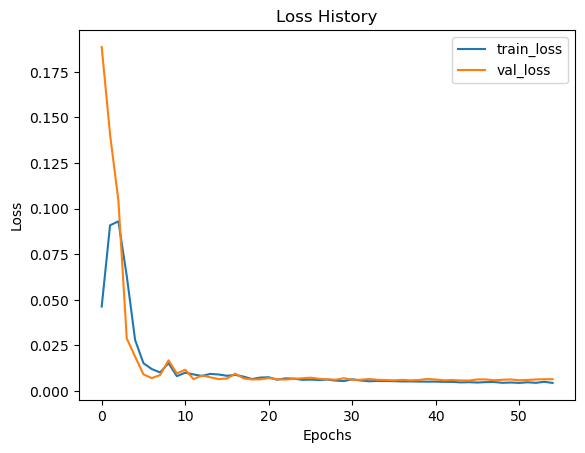

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

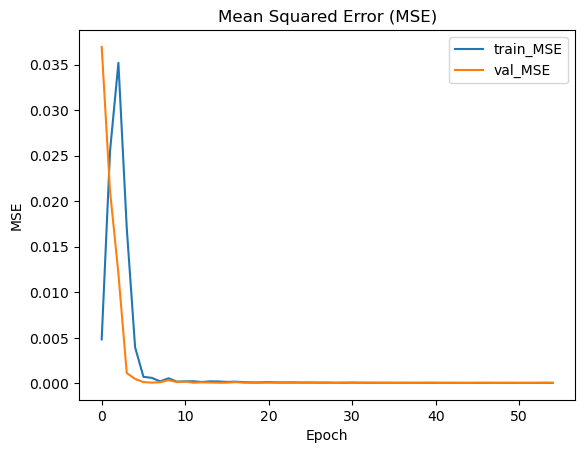

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

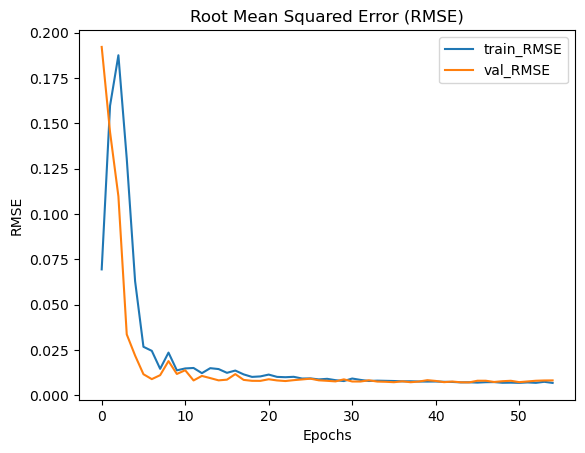

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

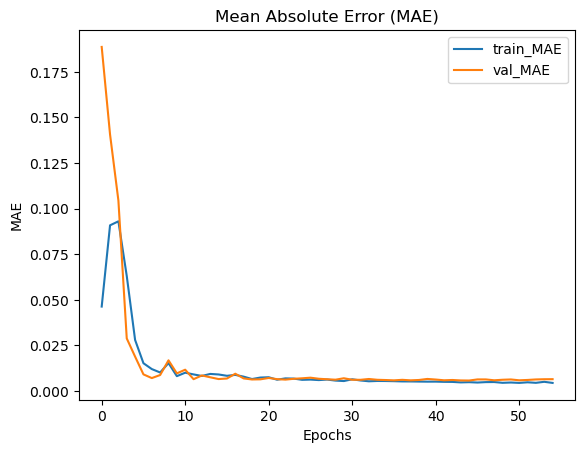

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

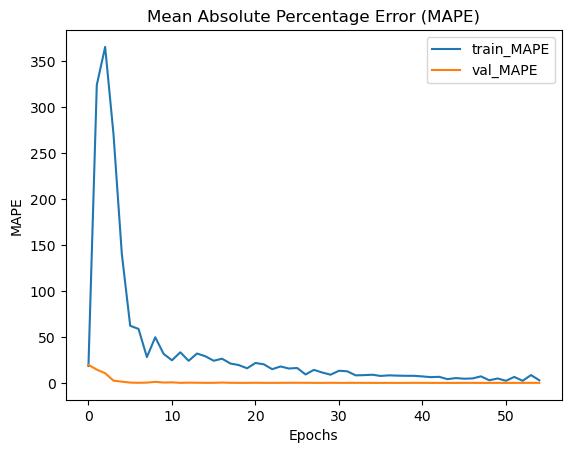

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:14:58.299055: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 5)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


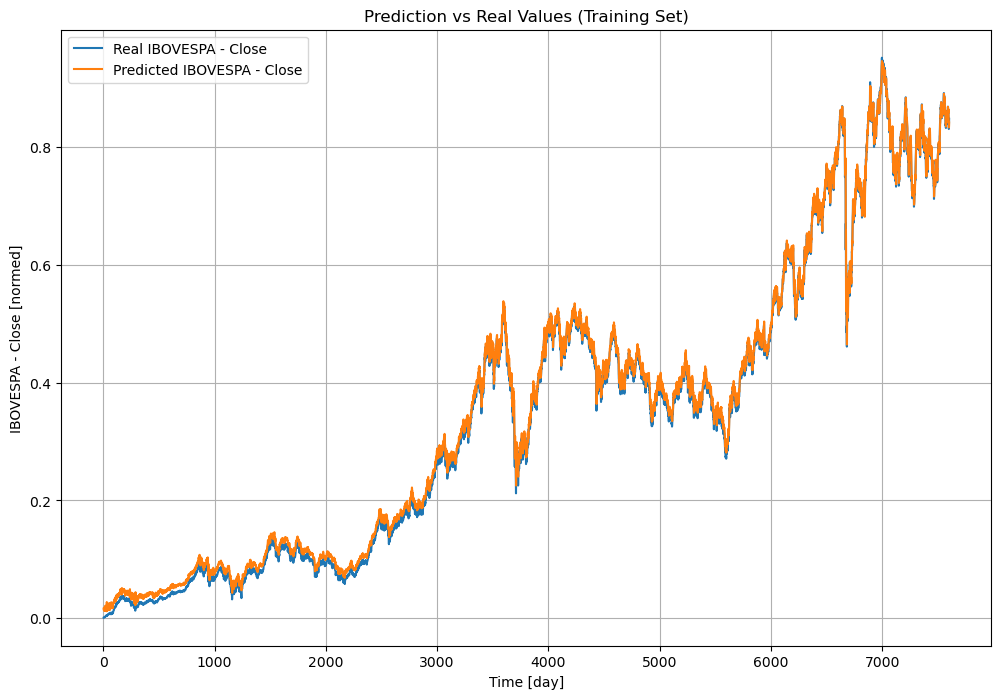

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 5)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


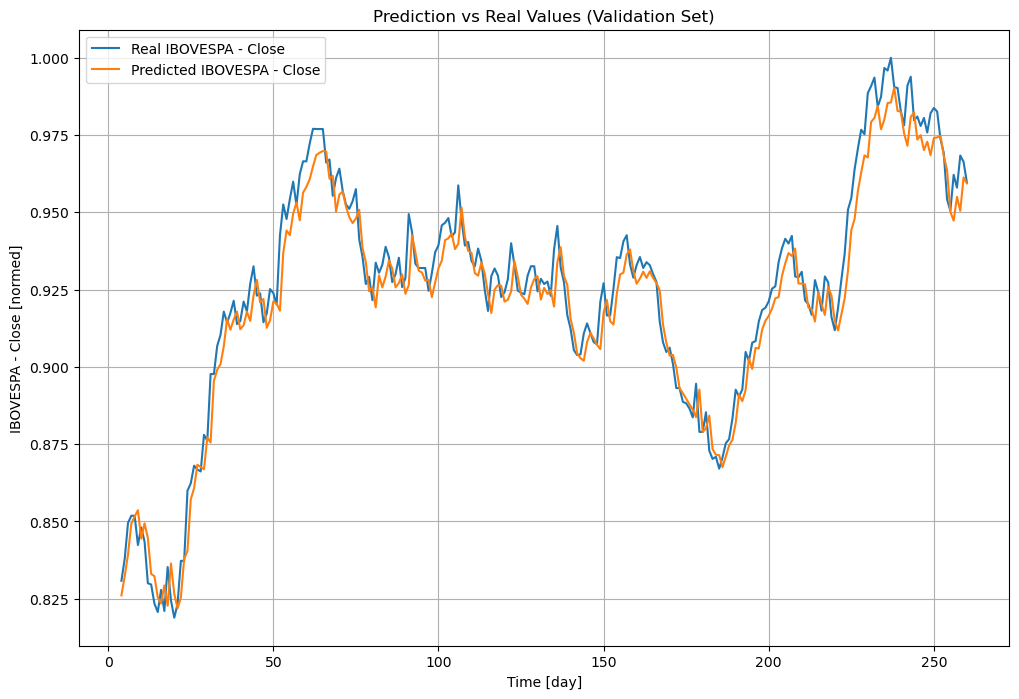

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 5)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


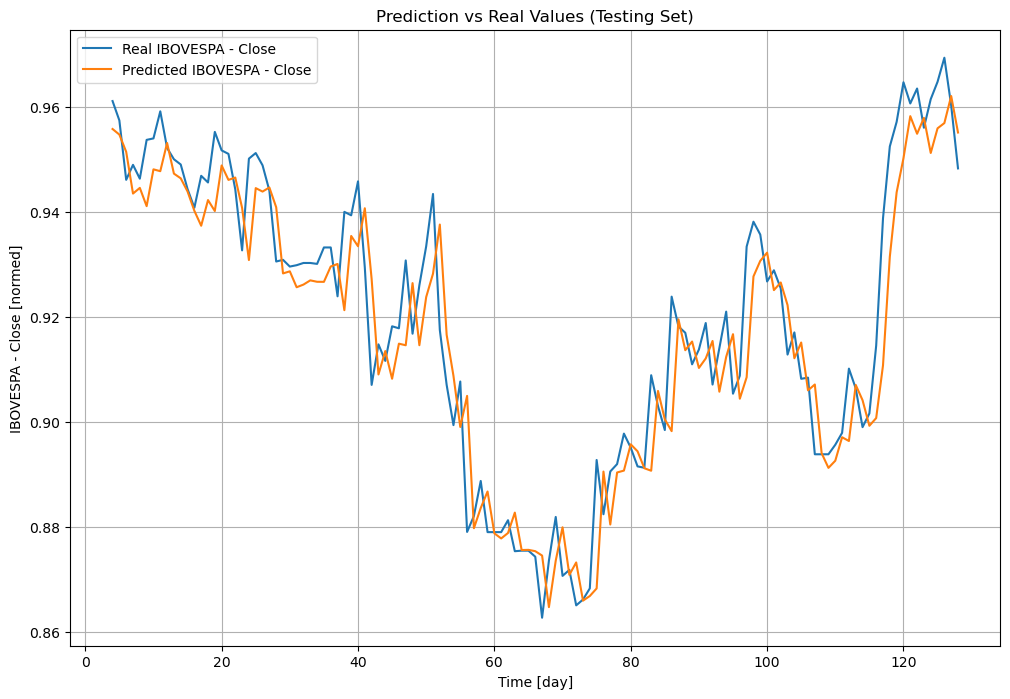

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

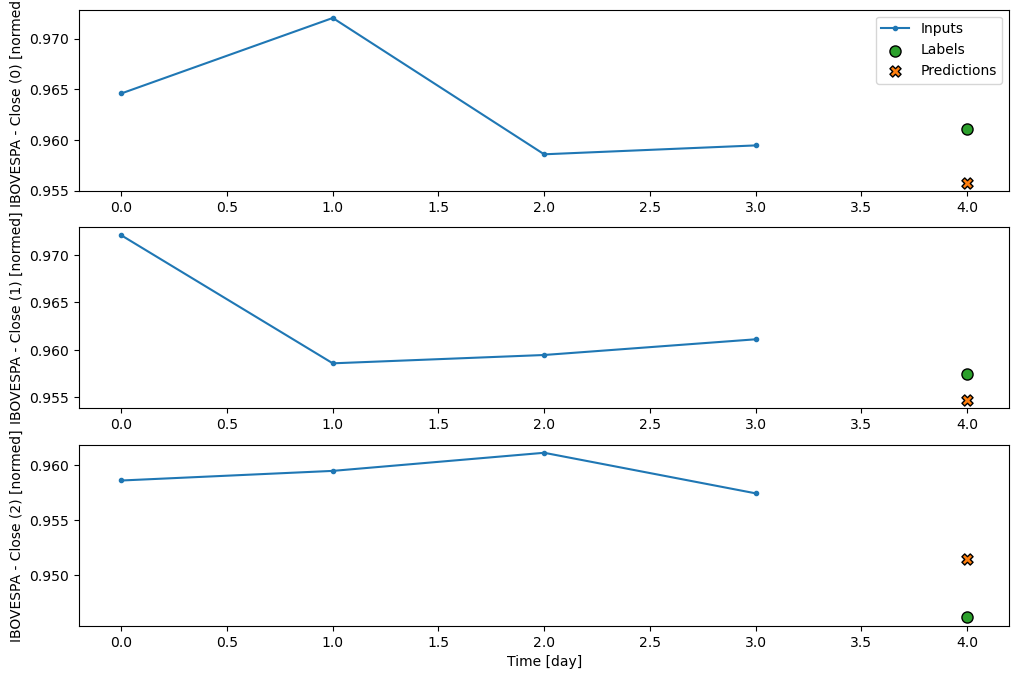

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:23s:182ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


array([[[0.95578825, 0.95578825, 0.95578825, ..., 0.95578825,
         0.95578825, 0.95578825]],

       [[0.9547232 , 0.9547232 , 0.9547232 , ..., 0.9547232 ,
         0.9547232 , 0.9547232 ]],

       [[0.9514451 , 0.9514451 , 0.9514451 , ..., 0.9514451 ,
         0.9514451 , 0.9514451 ]],

       ...,

       [[0.9569181 , 0.9569181 , 0.9569181 , ..., 0.9569181 ,
         0.9569181 , 0.9569181 ]],

       [[0.96207476, 0.96207476, 0.96207476, ..., 0.96207476,
         0.96207476, 0.96207476]],

       [[0.9551197 , 0.9551197 , 0.9551197 , ..., 0.9551197 ,
         0.9551197 , 0.9551197 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')